In [3]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

from ipywidgets import interact
from PIL import Image
from sklearn import preprocessing
from scipy.stats import pearsonr # 科学技術計算ライブラリ

## データ読み込み

In [3]:
#df = pd.read_csv('bbb.tsv',  delimiter='\t',encoding = "shift_jis")
df = pd.read_csv('honest_df.csv',index_col=0)
df

/home/taki/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,1000_Q3.4,1000_Q3.5,1000_Q3.6,1000_Q3.7,Q16_1,Q16_2,Q16_3,Q16_4,Q17,SC0
0,2022-01-07 11:00:30,2022-01-07 11:07:20,0,180.22.146.115,100,409,1,2022-01-07 11:07:20,R_3fpkfBGsIjikO4h,NaN,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,NaN,10.0
1,2022-01-07 11:00:26,2022-01-07 11:07:22,0,153.231.16.67,100,416,1,2022-01-07 11:07:23,R_31TNqYdcqP4G34n,NaN,...,NaN,NaN,NaN,NaN,2.0,5.0,4.0,4.0,NaN,10.0
2,2022-01-07 11:00:29,2022-01-07 11:07:30,0,111.239.160.78,100,421,1,2022-01-07 11:07:30,R_23ZFkUYHDU2bciY,NaN,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,5.0,???z?u???I???{?^???????????,10.0
3,2022-01-07 11:00:36,2022-01-07 11:07:39,0,220.5.139.23,100,422,1,2022-01-07 11:07:40,R_1dudJT5SpbbbvOF,NaN,...,NaN,NaN,NaN,NaN,4.0,1.0,3.0,5.0,NaN,10.0
4,2022-01-07 11:00:45,2022-01-07 11:07:44,0,119.231.92.38,100,418,1,2022-01-07 11:07:44,R_3fdAlVj370dTy0p,NaN,...,NaN,NaN,NaN,NaN,4.0,2.0,4.0,5.0,??V?????????,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,2022-01-12 16:22:10,2022-01-12 16:32:56,0,203.136.18.242,100,646,1,2022-01-12 16:32:57,R_2B4JZslJwt0TtjT,NaN,...,NaN,NaN,NaN,NaN,5.0,4.0,5.0,1.0,NaN,10.0
3601,2022-01-12 16:16:37,2022-01-12 16:38:18,0,114.170.105.224,100,1301,1,2022-01-12 16:38:19,R_21ytmvvO6egYX0R,NaN,...,NaN,NaN,NaN,NaN,5.0,6.0,6.0,3.0,???????B,9.0
3602,2022-01-12 16:32:11,2022-01-12 16:40:12,0,125.52.121.56,100,480,1,2022-01-12 16:40:12,R_ysic94lZcjztJKN,NaN,...,NaN,NaN,NaN,NaN,1.0,5.0,5.0,2.0,???????????B,10.0
3603,2022-01-12 16:21:12,2022-01-12 16:41:28,0,115.177.15.128,100,1216,1,2022-01-12 16:41:29,R_T0CMPLOeILZ3CkF,NaN,...,NaN,NaN,NaN,NaN,5.0,5.0,2.0,5.0,?A???P?[?g??i????????????????????,10.0


## 誠実回答者の属性

### 年齢

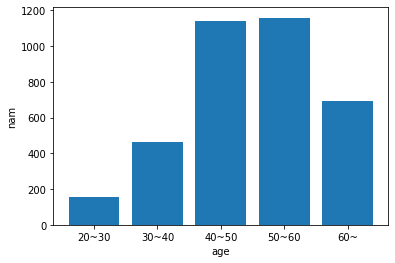

[155, 462, 1138, 1158, 692]


In [131]:
age = df["Q2.3"].dropna(how='all')
age = age.astype(int)

age20 = age < 30
age30 = (30 <= age) & (age < 40)
age40 = (40 <= age) & (age < 50)
age50 = (50 <= age) & (age < 60)
age60 = (60 <= age)

age_list = [int(age20.sum()), int(age30.sum()), int(age40.sum()), int(age50.sum()), int(age60.sum())]
x = ["20~30","30~40","40~50","50~60","60~"]

xs = [i + 0.5 for i, _ in enumerate(x)] 


#plt.title("人", fontname="MS Gothic")  # グラフのタイトル
plt.xlabel("age")
plt.ylabel("nam")

plt.bar(xs , age_list)
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x)
plt.show()

print(age_list)

### 性別

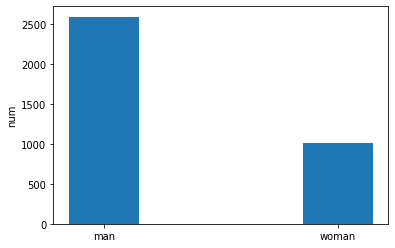

[2589, 1016]


In [15]:
sex = df.loc[:,["Q2.2"]]
#sex = df_r["Q2.2"]

x = ["man", "woman"]
xs = [i + 0.5 for i, _ in enumerate(x)] 

man = (sex == 1)
woman = (sex == 2)
sex_list = [int(man.sum()), int(woman.sum())]

plt.title("")  # グラフのタイトル

plt.ylabel("num")


plt.bar(xs, sex_list, width=0.3, )
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x)
plt.show()

print(sex_list)

## 画像ごとの回答者数

In [18]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("参加者数")    
print("平均：",participant.mean())
print("標準偏差：",participant.std())
print("最小値：",participant.min())
print("最大値：",participant.max())

参加者数
平均： 0    18.025
dtype: float64
標準偏差： 0    4.226848
dtype: float64
最小値： 0    7
dtype: int64
最大値： 0    32
dtype: int64


## 属性ごとにdfを分ける

### 性別で分ける

In [146]:
drop_index_f = df.index[df['Q2.2'] == 2] # 1:man, 2:woman
male_df = df.drop(drop_index_f)

drop_index_m = df.index[df['Q2.2'] == 1] # 1:man, 2:woman
female_df = df.drop(drop_index_m)

print("male num:",len(male_df))
print("female num:",len(female_df))


male num: 2589
female num: 1016


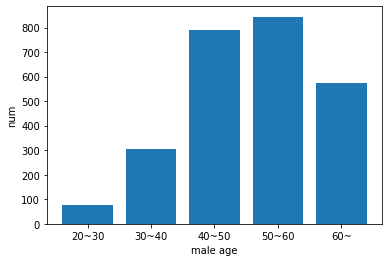

[76, 304, 790, 844, 575]
2589


In [68]:
age = male_df["Q2.3"].dropna(how='all')
age = age.astype(int)

age20 = age < 30
age30 = (30 <= age) & (age < 40)
age40 = (40 <= age) & (age < 50)
age50 = (50 <= age) & (age < 60)
age60 = (60 <= age)

age_list = [int(age20.sum()), int(age30.sum()), int(age40.sum()), int(age50.sum()), int(age60.sum())]
x = ["20~30","30~40","40~50","50~60","60~"]

xs = [i + 0.5 for i, _ in enumerate(x)] 


#plt.title("人", fontname="MS Gothic")  # グラフのタイトル
plt.xlabel("male age")
plt.ylabel("num")

plt.bar(xs , age_list)
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x)
plt.show()

print(age_list)
print(sum(age_list))

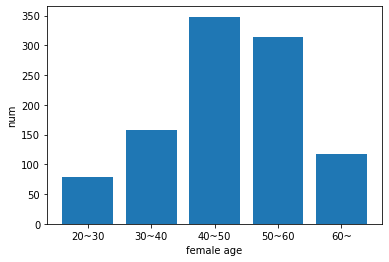

[79, 158, 348, 314, 117]
1016


In [69]:
age = female_df["Q2.3"].dropna(how='all')
age = age.astype(int)

age20 = age < 30
age30 = (30 <= age) & (age < 40)
age40 = (40 <= age) & (age < 50)
age50 = (50 <= age) & (age < 60)
age60 = (60 <= age)

age_list = [int(age20.sum()), int(age30.sum()), int(age40.sum()), int(age50.sum()), int(age60.sum())]
x = ["20~30","30~40","40~50","50~60","60~"]

xs = [i + 0.5 for i, _ in enumerate(x)] 


#plt.title("人", fontname="MS Gothic")  # グラフのタイトル
plt.xlabel("female age")
plt.ylabel("num")

plt.bar(xs , age_list)
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x)
plt.show()

print(age_list)
print(sum(age_list))

男性の参加者数
平均： 12.945
標準偏差： 3.669801417303454
最小値： 3
最大値： 27
回答者が3人の枚数： 1
回答者が4人の枚数： 6


(array([ 19.,  52., 170., 227., 204., 228.,  60.,  31.,   7.,   2.]),
 array([ 3. ,  5.4,  7.8, 10.2, 12.6, 15. , 17.4, 19.8, 22.2, 24.6, 27. ]),
 <BarContainer object of 10 artists>)

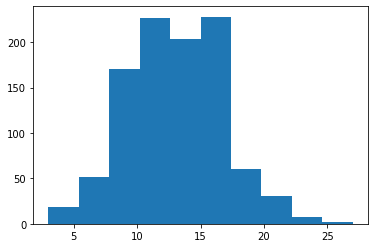

In [150]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = male_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("男性の参加者数")    
print("平均：",participant.mean()[0])
print("標準偏差：",participant.std()[0])
print("最小値：",participant.min()[0])
print("最大値：",participant.max()[0])
print("回答者が3人の枚数：",(participant[0]==3).sum())
print("回答者が4人の枚数：",(participant[0]==4).sum())

plt.hist(participant)

女性の参加者数
平均： 5.08
標準偏差： 2.148072208798907
最小値： 0
最大値： 13
回答者が0人の枚数： 3
0のインデックス Index(['297', '498', '794'], dtype='object')
回答者が1人の枚数： 30


(array([ 33.,  76., 122., 379., 145., 106., 106.,  24.,   5.,   4.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

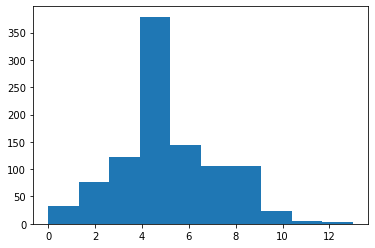

In [158]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = female_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("女性の参加者数")    
print("平均：",participant.mean()[0])
print("標準偏差：",participant.std()[0])
print("最小値：",participant.min()[0])
print("最大値：",participant.max()[0])
print("回答者が0人の枚数：",(participant[0]==0).sum())
print("0のインデックス",participant.index[participant[0]==0])
print("回答者が1人の枚数：",(participant[0]==1).sum())



plt.hist(participant)

In [156]:
participant.index[participant[0]==0]


Index(['297', '498', '794'], dtype='object')

#### 平均df作成

In [105]:
str_list   = []
list_32    = []
list_33_37 = []
for i in range(1,33):
    s = "Q3.2_"
    str_list.append(s+"{}".format(i))
    list_32.append(s+"{}".format(i))
    
for i in range(3,8):
    str_list.append("Q3.{}".format(i))
    list_33_37.append("Q3.{}".format(i))
    
str_list.insert(0,"Q3.1_1")

In [108]:
img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = male_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
male_df_mean = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())
male_df_mean.to_csv("male_df_mean.csv")
male_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,71.111111,5.000000,4.777778,4.666667,4.333333,4.222222,3.666667,4.555556,4.222222,4.444444,...,4.666667,4.333333,5.555556,5.000000,5.333333,5.666667,4.444444,4.111111,4.222222,5.555556
2,57.357143,4.428571,4.642857,4.142857,4.357143,4.642857,4.571429,4.285714,4.142857,4.714286,...,4.785714,4.071429,5.428571,4.857143,5.571429,4.214286,4.214286,4.285714,3.928571,5.000000
3,67.166667,4.750000,5.250000,5.000000,3.916667,3.750000,3.250000,4.333333,4.333333,4.083333,...,4.583333,4.250000,5.416667,5.166667,5.666667,5.333333,4.166667,4.083333,4.416667,4.833333
4,53.333333,3.750000,4.000000,3.750000,5.416667,5.500000,5.250000,5.000000,5.000000,4.666667,...,4.416667,3.750000,5.416667,4.666667,5.833333,4.083333,4.000000,5.083333,4.166667,5.416667
5,56.727273,3.363636,3.454545,3.454545,4.636364,4.727273,4.454545,4.090909,4.090909,4.181818,...,4.363636,3.545455,4.727273,4.909091,5.545455,4.000000,4.181818,4.818182,3.818182,4.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,70.000000,5.000000,4.583333,4.500000,4.500000,4.750000,4.000000,4.666667,4.833333,4.916667,...,5.000000,3.750000,5.333333,5.166667,5.833333,5.333333,4.750000,4.916667,5.083333,5.250000
997,58.937500,5.062500,5.000000,5.187500,3.187500,3.625000,3.062500,3.500000,3.500000,3.375000,...,4.500000,3.812500,4.562500,4.875000,4.750000,5.000000,3.750000,3.500000,3.750000,4.312500
998,71.900000,5.700000,5.700000,5.500000,3.100000,2.800000,2.200000,3.300000,2.700000,3.300000,...,4.200000,3.600000,5.300000,4.700000,5.200000,5.700000,4.300000,3.300000,3.700000,4.800000
999,62.125000,4.500000,4.875000,4.375000,4.500000,4.875000,3.750000,4.500000,4.375000,4.375000,...,4.125000,4.250000,3.250000,4.750000,5.375000,5.000000,5.000000,4.625000,4.250000,4.750000


In [109]:
img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = female_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
female_df_mean = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())
female_df_mean.to_csv("female_df_mean.csv")
female_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,61.666667,5.333333,4.666667,5.00,3.666667,3.666667,3.333333,4.000000,3.333333,3.333333,...,5.000000,4.000000,5.333333,5.000000,4.333333,5.000000,5.000000,4.000000,4.00,5.333333
2,51.400000,3.800000,4.400000,4.00,4.400000,5.200000,4.400000,4.400000,4.600000,4.400000,...,5.000000,3.800000,5.000000,4.400000,4.800000,4.400000,4.400000,4.400000,3.80,4.800000
3,79.000000,5.500000,5.333333,5.00,3.333333,3.833333,3.333333,4.333333,4.000000,3.833333,...,5.166667,3.666667,6.166667,5.833333,5.833333,5.833333,4.833333,4.666667,4.50,5.666667
4,46.000000,3.000000,3.000000,3.00,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,4.000000,5.000000,4.000000,7.000000,3.000000,4.000000,3.000000,3.00,4.000000
5,59.250000,2.750000,3.500000,2.75,5.000000,5.000000,5.000000,4.500000,5.000000,4.500000,...,3.500000,4.000000,5.250000,4.000000,5.500000,3.750000,4.750000,5.500000,4.25,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,71.800000,4.800000,4.800000,4.80,4.400000,4.400000,4.200000,4.800000,4.800000,5.000000,...,5.000000,4.000000,4.800000,4.600000,5.200000,5.400000,4.800000,4.800000,5.00,5.000000
997,69.000000,5.250000,5.500000,5.75,4.000000,3.750000,3.250000,4.750000,4.500000,3.750000,...,5.250000,4.250000,6.250000,6.000000,6.750000,5.500000,4.250000,4.750000,5.25,5.500000
998,79.000000,5.500000,5.250000,5.50,3.000000,3.500000,2.500000,4.500000,4.500000,4.500000,...,5.250000,4.250000,5.000000,5.000000,4.750000,5.500000,4.500000,4.250000,5.00,5.000000
999,65.500000,4.500000,5.250000,4.25,4.750000,5.750000,4.500000,4.250000,4.000000,4.250000,...,6.250000,4.000000,4.250000,5.750000,5.250000,5.000000,5.750000,4.250000,5.00,4.750000


In [119]:
path_df = pd.read_csv("bentodataset1000.csv")
path_df["path"][500]

'nagae_bento (8).jpg'

#### dataset作成

In [81]:
# df 読み込み
male_df_mean = pd.read_csv('male_df_mean.csv',index_col=0)
female_df_mean = pd.read_csv('female_df_mean.csv',index_col=0)


In [9]:
qstr = "Q3.2_1"
print("男性の好み")    
print("平均：",male_df_mean[qstr].mean())
print("中央値：",male_df_mean[qstr].median())
print("標準偏差：",male_df_mean[qstr].std())
print("最小値：",male_df_mean[qstr].min())
print("最大値：",male_df_mean[qstr].max())

print("女性の好み")    
print("平均：",female_df_mean[qstr].mean())
print("中央値：",female_df_mean[qstr].median())
print("標準偏差：",female_df_mean[qstr].std())
print("最小値：",female_df_mean[qstr].min())
print("最大値：",female_df_mean[qstr].max())

男性の好み
平均： 4.438975008168434
中央値： 4.418859649122807
標準偏差： 0.63282222401656
最小値： 2.2
最大値： 6.5
女性の好み
平均： 4.5408073176127335
中央値： 4.5
標準偏差： 0.9129288471456383
最小値： 1.0
最大値： 7.0


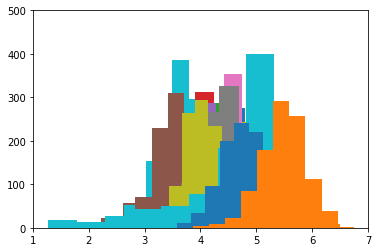

In [21]:
for i in range(1,33):
    qstr = f"Q3.2_{i}"
    plt.xlim(1,7)
    plt.ylim(0,500)
    plt.hist(male_df_mean[qstr])

In [82]:
male_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,71.111111,5.000000,4.777778,4.666667,4.333333,4.222222,3.666667,4.555556,4.222222,4.444444,...,4.666667,4.333333,5.555556,5.000000,5.333333,5.666667,4.444444,4.111111,4.222222,5.555556
2,57.357143,4.428571,4.642857,4.142857,4.357143,4.642857,4.571429,4.285714,4.142857,4.714286,...,4.785714,4.071429,5.428571,4.857143,5.571429,4.214286,4.214286,4.285714,3.928571,5.000000
3,67.166667,4.750000,5.250000,5.000000,3.916667,3.750000,3.250000,4.333333,4.333333,4.083333,...,4.583333,4.250000,5.416667,5.166667,5.666667,5.333333,4.166667,4.083333,4.416667,4.833333
4,53.333333,3.750000,4.000000,3.750000,5.416667,5.500000,5.250000,5.000000,5.000000,4.666667,...,4.416667,3.750000,5.416667,4.666667,5.833333,4.083333,4.000000,5.083333,4.166667,5.416667
5,56.727273,3.363636,3.454545,3.454545,4.636364,4.727273,4.454545,4.090909,4.090909,4.181818,...,4.363636,3.545455,4.727273,4.909091,5.545455,4.000000,4.181818,4.818182,3.818182,4.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,70.000000,5.000000,4.583333,4.500000,4.500000,4.750000,4.000000,4.666667,4.833333,4.916667,...,5.000000,3.750000,5.333333,5.166667,5.833333,5.333333,4.750000,4.916667,5.083333,5.250000
997,58.937500,5.062500,5.000000,5.187500,3.187500,3.625000,3.062500,3.500000,3.500000,3.375000,...,4.500000,3.812500,4.562500,4.875000,4.750000,5.000000,3.750000,3.500000,3.750000,4.312500
998,71.900000,5.700000,5.700000,5.500000,3.100000,2.800000,2.200000,3.300000,2.700000,3.300000,...,4.200000,3.600000,5.300000,4.700000,5.200000,5.700000,4.300000,3.300000,3.700000,4.800000
999,62.125000,4.500000,4.875000,4.375000,4.500000,4.875000,3.750000,4.500000,4.375000,4.375000,...,4.125000,4.250000,3.250000,4.750000,5.375000,5.000000,5.000000,4.625000,4.250000,4.750000


In [85]:
male_score_df = male_df_mean.drop('Q3.1_1', axis=1)
for i in range(3,8):
    male_score_df = male_score_df.drop("Q3.{}".format(i),axis=1)


mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(male_score_df)

male_norm_score_df = pd.DataFrame(norm_score,columns=male_score_df.columns)
male_norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,Q3.2_10,...,Q3.2_23,Q3.2_24,Q3.2_25,Q3.2_26,Q3.2_27,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32
0,0.651163,0.529551,0.551515,0.595194,0.543807,0.456522,0.608446,0.522345,0.565826,0.193548,...,0.375000,0.460317,0.679487,0.257143,0.538194,0.693780,0.681239,0.846307,0.553191,0.510288
1,0.518272,0.489362,0.418182,0.600739,0.658179,0.677795,0.538745,0.501845,0.633854,0.156682,...,0.535714,0.367347,0.539835,0.477551,0.803571,0.727956,0.571038,0.821215,0.497872,0.592593
2,0.593023,0.670213,0.636364,0.498152,0.415408,0.354620,0.551046,0.551046,0.474790,0.279570,...,0.437500,0.380952,0.471154,0.514286,0.494792,0.669856,0.646175,0.818862,0.617730,0.625514
3,0.360465,0.297872,0.318182,0.847505,0.891239,0.843750,0.723247,0.723247,0.621849,0.322581,...,0.406250,0.476190,0.519231,0.371429,0.703125,0.622010,0.435792,0.818862,0.424113,0.683128
4,0.270613,0.135397,0.242975,0.665770,0.681132,0.649209,0.488427,0.488427,0.499618,0.357771,...,0.443182,0.506494,0.493007,0.724675,0.696023,0.606786,0.349727,0.682635,0.517988,0.583614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.651163,0.471631,0.509091,0.634011,0.687311,0.538043,0.637146,0.680197,0.684874,0.387097,...,0.718750,0.309524,0.663462,0.371429,0.755208,0.789474,0.435792,0.802395,0.617730,0.683128
996,0.665698,0.595745,0.684091,0.328327,0.381420,0.308764,0.335793,0.335793,0.296218,0.322581,...,0.375000,0.375000,0.555288,0.407143,0.566406,0.645933,0.462090,0.650075,0.504787,0.308642
997,0.813953,0.804255,0.763636,0.307948,0.157100,0.097826,0.284133,0.129151,0.277311,0.245161,...,0.412500,0.314286,0.548077,0.257143,0.593750,0.559809,0.372678,0.795808,0.437021,0.464198
998,0.534884,0.558511,0.477273,0.634011,0.721299,0.476902,0.594096,0.561808,0.548319,0.419355,...,0.375000,0.571429,0.735577,0.514286,0.585938,0.538278,0.646175,0.390719,0.456383,0.524691


In [86]:
female_score_df = female_df_mean.drop('Q3.1_1', axis=1)
for i in range(3,8):
    female_score_df = female_score_df.drop("Q3.{}".format(i),axis=1)


mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(female_score_df)

female_norm_score_df = pd.DataFrame(norm_score,columns=female_score_df.columns)
female_norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,Q3.2_10,...,Q3.2_23,Q3.2_24,Q3.2_25,Q3.2_26,Q3.2_27,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32
0,0.722222,0.611111,0.666667,0.444444,0.444444,0.388889,0.437500,0.388889,0.352941,0.500000,...,0.600000,0.518519,0.611111,0.533333,0.266667,0.666667,0.437500,0.722222,0.600000,0.407407
1,0.466667,0.566667,0.500000,0.566667,0.700000,0.566667,0.512500,0.600000,0.541176,0.300000,...,0.640000,0.400000,0.433333,0.600000,0.560000,0.666667,0.400000,0.666667,0.480000,0.511111
2,0.750000,0.722222,0.666667,0.388889,0.472222,0.388889,0.500000,0.500000,0.441176,0.388889,...,0.633333,0.444444,0.555556,0.400000,0.700000,0.694444,0.375000,0.861111,0.766667,0.740741
3,0.333333,0.333333,0.333333,0.166667,0.500000,0.333333,0.062500,0.166667,0.117647,0.000000,...,0.400000,0.000000,0.166667,0.400000,0.800000,0.166667,0.437500,0.666667,0.400000,1.000000
4,0.291667,0.416667,0.291667,0.666667,0.666667,0.666667,0.531250,0.666667,0.558824,0.375000,...,0.550000,0.500000,0.500000,0.450000,0.550000,0.416667,0.437500,0.708333,0.400000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.633333,0.633333,0.633333,0.566667,0.566667,0.533333,0.587500,0.633333,0.647059,0.533333,...,0.520000,0.533333,0.633333,0.520000,0.480000,0.666667,0.437500,0.633333,0.520000,0.600000
996,0.708333,0.750000,0.791667,0.500000,0.458333,0.375000,0.578125,0.583333,0.426471,0.333333,...,0.600000,0.444444,0.458333,0.450000,0.700000,0.708333,0.484375,0.875000,0.800000,0.944444
997,0.750000,0.708333,0.750000,0.333333,0.416667,0.250000,0.531250,0.583333,0.558824,0.375000,...,0.500000,0.611111,0.500000,0.300000,0.600000,0.708333,0.484375,0.666667,0.600000,0.500000
998,0.583333,0.708333,0.541667,0.625000,0.791667,0.583333,0.484375,0.500000,0.514706,0.708333,...,0.700000,0.777778,0.625000,0.450000,0.550000,0.875000,0.437500,0.541667,0.750000,0.611111


In [89]:
word = "./word.csv"
word = pd.read_csv(word, header=None)

col_dict = {}
for i in range(len(female_norm_score_df.columns)):
    col_dict[female_norm_score_df.columns[i]] = word[0][i]

col_dict

{'Q3.2_1': 'がっつり食べれそう',
 'Q3.2_2': 'お腹にたまる',
 'Q3.2_3': 'ボリューム感がある',
 'Q3.2_4': 'ヘルシー',
 'Q3.2_5': '胃もたれしない',
 'Q3.2_6': 'あっさりしている',
 'Q3.2_7': '体にいい, 体によさそう',
 'Q3.2_8': '体を気遣っている',
 'Q3.2_9': '栄養バランスがいい',
 'Q3.2_10': '珍しい',
 'Q3.2_11': '早く食べれる',
 'Q3.2_12': '色鮮やか',
 'Q3.2_13': '配色がきれい',
 'Q3.2_14': '彩がきれい',
 'Q3.2_15': '他と違う並べ方',
 'Q3.2_16': '普段食べない',
 'Q3.2_17': '凝っている',
 'Q3.2_18': '作れそう, 自分で作れる',
 'Q3.2_19': '食べやすい',
 'Q3.2_20': '似てる',
 'Q3.2_21': '一口サイズ',
 'Q3.2_22': 'きれいな器',
 'Q3.2_23': '場所が固まっている',
 'Q3.2_24': '新鮮',
 'Q3.2_25': 'つやがある',
 'Q3.2_26': 'ぱさってする',
 'Q3.2_27': 'もったいなくない',
 'Q3.2_28': 'くずれない',
 'Q3.2_29': '時間が増える',
 'Q3.2_30': '米がある安心感',
 'Q3.2_31': 'ぺちゃんこじゃない',
 'Q3.2_32': '食べきれる'}

In [92]:
male_norm_score_df = male_norm_score_df.rename(columns=col_dict)
male_norm_score_df.to_csv("male_norm_score_df.csv",encoding='utf_8_sig')
male_norm_score_df

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.651163,0.529551,0.551515,0.595194,0.543807,0.456522,0.608446,0.522345,0.565826,0.193548,...,0.375000,0.460317,0.679487,0.257143,0.538194,0.693780,0.681239,0.846307,0.553191,0.510288
1,0.518272,0.489362,0.418182,0.600739,0.658179,0.677795,0.538745,0.501845,0.633854,0.156682,...,0.535714,0.367347,0.539835,0.477551,0.803571,0.727956,0.571038,0.821215,0.497872,0.592593
2,0.593023,0.670213,0.636364,0.498152,0.415408,0.354620,0.551046,0.551046,0.474790,0.279570,...,0.437500,0.380952,0.471154,0.514286,0.494792,0.669856,0.646175,0.818862,0.617730,0.625514
3,0.360465,0.297872,0.318182,0.847505,0.891239,0.843750,0.723247,0.723247,0.621849,0.322581,...,0.406250,0.476190,0.519231,0.371429,0.703125,0.622010,0.435792,0.818862,0.424113,0.683128
4,0.270613,0.135397,0.242975,0.665770,0.681132,0.649209,0.488427,0.488427,0.499618,0.357771,...,0.443182,0.506494,0.493007,0.724675,0.696023,0.606786,0.349727,0.682635,0.517988,0.583614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.651163,0.471631,0.509091,0.634011,0.687311,0.538043,0.637146,0.680197,0.684874,0.387097,...,0.718750,0.309524,0.663462,0.371429,0.755208,0.789474,0.435792,0.802395,0.617730,0.683128
996,0.665698,0.595745,0.684091,0.328327,0.381420,0.308764,0.335793,0.335793,0.296218,0.322581,...,0.375000,0.375000,0.555288,0.407143,0.566406,0.645933,0.462090,0.650075,0.504787,0.308642
997,0.813953,0.804255,0.763636,0.307948,0.157100,0.097826,0.284133,0.129151,0.277311,0.245161,...,0.412500,0.314286,0.548077,0.257143,0.593750,0.559809,0.372678,0.795808,0.437021,0.464198
998,0.534884,0.558511,0.477273,0.634011,0.721299,0.476902,0.594096,0.561808,0.548319,0.419355,...,0.375000,0.571429,0.735577,0.514286,0.585938,0.538278,0.646175,0.390719,0.456383,0.524691


In [93]:
female_norm_score_df = female_norm_score_df.rename(columns=col_dict)
female_norm_score_df.to_csv("female_norm_score_df.csv",encoding='utf_8_sig')
female_norm_score_df

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.722222,0.611111,0.666667,0.444444,0.444444,0.388889,0.437500,0.388889,0.352941,0.500000,...,0.600000,0.518519,0.611111,0.533333,0.266667,0.666667,0.437500,0.722222,0.600000,0.407407
1,0.466667,0.566667,0.500000,0.566667,0.700000,0.566667,0.512500,0.600000,0.541176,0.300000,...,0.640000,0.400000,0.433333,0.600000,0.560000,0.666667,0.400000,0.666667,0.480000,0.511111
2,0.750000,0.722222,0.666667,0.388889,0.472222,0.388889,0.500000,0.500000,0.441176,0.388889,...,0.633333,0.444444,0.555556,0.400000,0.700000,0.694444,0.375000,0.861111,0.766667,0.740741
3,0.333333,0.333333,0.333333,0.166667,0.500000,0.333333,0.062500,0.166667,0.117647,0.000000,...,0.400000,0.000000,0.166667,0.400000,0.800000,0.166667,0.437500,0.666667,0.400000,1.000000
4,0.291667,0.416667,0.291667,0.666667,0.666667,0.666667,0.531250,0.666667,0.558824,0.375000,...,0.550000,0.500000,0.500000,0.450000,0.550000,0.416667,0.437500,0.708333,0.400000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.633333,0.633333,0.633333,0.566667,0.566667,0.533333,0.587500,0.633333,0.647059,0.533333,...,0.520000,0.533333,0.633333,0.520000,0.480000,0.666667,0.437500,0.633333,0.520000,0.600000
996,0.708333,0.750000,0.791667,0.500000,0.458333,0.375000,0.578125,0.583333,0.426471,0.333333,...,0.600000,0.444444,0.458333,0.450000,0.700000,0.708333,0.484375,0.875000,0.800000,0.944444
997,0.750000,0.708333,0.750000,0.333333,0.416667,0.250000,0.531250,0.583333,0.558824,0.375000,...,0.500000,0.611111,0.500000,0.300000,0.600000,0.708333,0.484375,0.666667,0.600000,0.500000
998,0.583333,0.708333,0.541667,0.625000,0.791667,0.583333,0.484375,0.500000,0.514706,0.708333,...,0.700000,0.777778,0.625000,0.450000,0.550000,0.875000,0.437500,0.541667,0.750000,0.611111


(array([ 12.,  34.,  55.,  94., 151., 214., 211., 136.,  80.,  10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

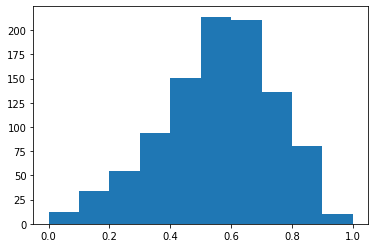

In [99]:
plt.hist(female_norm_score_df["色鮮やか"])

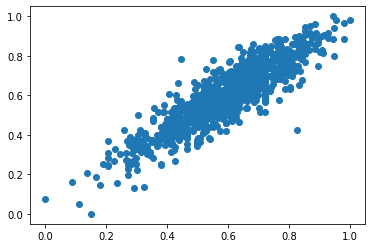

相関係数: 0.8992509206546789
p値: 0.0


In [126]:
row1 = male_norm_score_df["体にいい, 体によさそう"]
row2 = male_norm_score_df["ヘルシー"]
plt.scatter(row1,row2)
a, b = pearsonr(row1,row2) # リストを整形し相関係数:aとp値:bの計算
plt.show()
print("相関係数:", a)
print("p値:", b)



(array([  5.,  13.,  23.,  83., 131., 270., 261., 143.,  56.,  12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

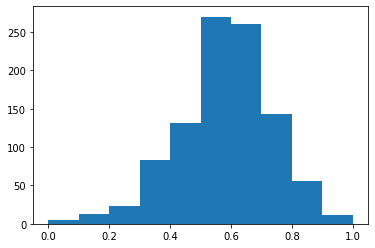

In [106]:
plt.hist(female_norm_score_df["ヘルシー"])

In [ ]:
for i in range(1,10):
    qstr = f"Q3.2_{i}"
    print(word[0][i-1])
    plt.ylim(0,500)
    plt.hist(preprocessing.minmax_scale(male_df_mean[qstr]))
    plt.show()

In [ ]:
for i in range(1,33):
    qstr = f"Q3.2_{i}"
    print(word[0][i-1])
    plt.xlim(1,7)
    plt.ylim(0,500)
    plt.hist(female_df_mean[qstr])
    plt.show()

## 年齢で分ける

In [133]:
age40_df = df[df['Q2.3'] < 40] 
age40_50_df = df[(df['Q2.3'] >= 40) & (df['Q2.3'] < 50)] 
age50_60_df = df[(df['Q2.3'] >= 50) & (df['Q2.3'] < 60)] 
age60_df = df[df['Q2.3'] >= 60] 


print("~40:",len(age40_df))
print("40~50:",len(age40_50_df))
print("50~60:",len(age50_60_df))
print("60~:",len(age60_df))
#[155, 462, 1138, 1158, 692]

~40: 617
40~50: 1138
50~60: 1158
60~: 692


~40の参加者数
平均： 3.085
標準偏差： 1.7391951586293586
最小値： 0
最大値： 9
回答者が0人の枚数： 41
0のインデックス Index(['5', '15', '26', '27', '72', '73', '80', '116', '129', '134', '139',
       '152', '153', '167', '174', '230', '328', '391', '397', '426', '445',
       '466', '513', '532', '538', '548', '554', '595', '596', '618', '630',
       '659', '669', '737', '775', '793', '802', '815', '846', '935', '994'],
      dtype='object')
回答者が1人の枚数： 154
0人を削除
平均： 3.2168925964546404
標準偏差： 1.6521278554864176
最小値： 1
最大値： 9


(array([ 41., 154., 201., 230., 178., 103.,  57.,  19.,  16.,   1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

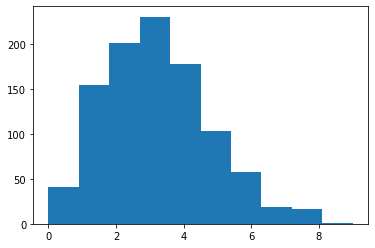

In [164]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = age40_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("~40の参加者数")    
print("平均：",participant.mean()[0])
print("標準偏差：",participant.std()[0])
print("最小値：",participant.min()[0])
print("最大値：",participant.max()[0])
print("回答者が0人の枚数：",(participant[0]==0).sum())
print("0のインデックス",participant.index[participant[0]==0])
print("回答者が1人の枚数：",(participant[0]==1).sum())
print("0人を削除")
aa = participant.drop(participant.index[participant[0]==0])
print("平均：",aa.mean()[0])
print("標準偏差：",aa.std()[0])
print("最小値：",aa.min()[0])
print("最大値：",aa.max()[0])

plt.hist(participant)

40~50の参加者数
平均： 5.69
標準偏差： 2.425238499979287
最小値： 0
最大値： 15
回答者が0人の枚数： 1
0のインデックス Index(['803'], dtype='object')
回答者が1人の枚数： 19
0人を削除
平均： 5.6956956956956954
標準偏差： 2.419752445041033
最小値： 1
最大値： 15


(array([ 20.,  55., 265., 158., 285.,  80., 106.,  12.,  17.,   2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

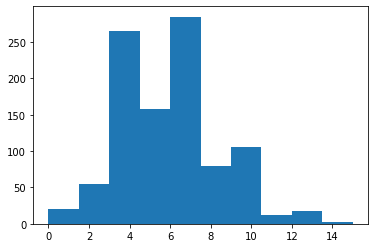

In [170]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = age40_50_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("40~50の参加者数")    
print("平均：",participant.mean()[0])
print("標準偏差：",participant.std()[0])
print("最小値：",participant.min()[0])
print("最大値：",participant.max()[0])
print("回答者が0人の枚数：",(participant[0]==0).sum())
print("0のインデックス",participant.index[participant[0]==0])
print("回答者が1人の枚数：",(participant[0]==1).sum())
print("0人を削除")
aa = participant.drop(participant.index[participant[0]==0])
print("平均：",aa.mean()[0])
print("標準偏差：",aa.std()[0])
print("最小値：",aa.min()[0])
print("最大値：",aa.max()[0])

plt.hist(participant)

50~60の参加者数
平均： 5.79
標準偏差： 2.4758897451280073
最小値： 0
最大値： 16
回答者が0人の枚数： 3
0のインデックス Index(['17', '283', '297'], dtype='object')
回答者が1人の枚数： 27
0人を削除
平均： 5.807422266800401
標準偏差： 2.4591083609612396
最小値： 1
最大値： 16


(array([ 30., 134., 148., 347., 107., 154.,  66.,   7.,   5.,   2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

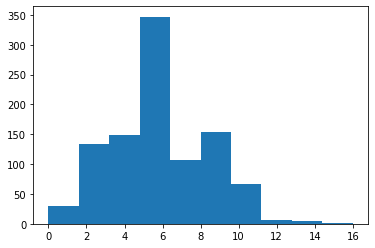

In [171]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = age50_60_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("50~60の参加者数")    
print("平均：",participant.mean()[0])
print("標準偏差：",participant.std()[0])
print("最小値：",participant.min()[0])
print("最大値：",participant.max()[0])
print("回答者が0人の枚数：",(participant[0]==0).sum())
print("0のインデックス",participant.index[participant[0]==0])
print("回答者が1人の枚数：",(participant[0]==1).sum())
print("0人を削除")
aa = participant.drop(participant.index[participant[0]==0])
print("平均：",aa.mean()[0])
print("標準偏差：",aa.std()[0])
print("最小値：",aa.min()[0])
print("最大値：",aa.max()[0])

plt.hist(participant)

60~の参加者数
平均： 3.46
標準偏差： 1.8681246986991766
最小値： 0
最大値： 11
回答者が0人の枚数： 30
0のインデックス Index(['13', '29', '46', '64', '78', '111', '286', '310', '326', '353', '366',
       '426', '477', '498', '499', '523', '524', '568', '604', '657', '694',
       '717', '756', '760', '761', '818', '821', '842', '932', '978'],
      dtype='object')
回答者が1人の枚数： 104
0人を削除
平均： 3.5670103092783507
標準偏差： 1.7932749989256622
最小値： 1
最大値： 11


(array([134., 206., 198., 199., 129.,  76.,  30.,  16.,   7.,   5.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

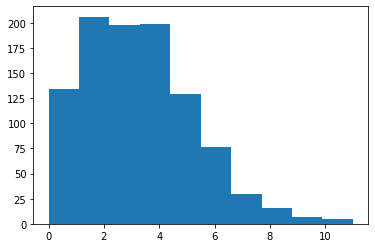

In [172]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = age60_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("60~の参加者数")    
print("平均：",participant.mean()[0])
print("標準偏差：",participant.std()[0])
print("最小値：",participant.min()[0])
print("最大値：",participant.max()[0])
print("回答者が0人の枚数：",(participant[0]==0).sum())
print("0のインデックス",participant.index[participant[0]==0])
print("回答者が1人の枚数：",(participant[0]==1).sum())
print("0人を削除")
aa = participant.drop(participant.index[participant[0]==0])
print("平均：",aa.mean()[0])
print("標準偏差：",aa.std()[0])
print("最小値：",aa.min()[0])
print("最大値：",aa.max()[0])


plt.hist(participant)

### 平均df作成

In [186]:
str_list   = []
list_32    = []
list_33_37 = []
for i in range(1,33):
    s = "Q3.2_"
    str_list.append(s+"{}".format(i))
    list_32.append(s+"{}".format(i))
    
for i in range(3,8):
    str_list.append("Q3.{}".format(i))
    list_33_37.append("Q3.{}".format(i))
    
str_list.insert(0,"Q3.1_1")

img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = age40_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
age40_df_mean = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())
age40_df_mean.to_csv("age40_df_mean.csv")
age40_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,70.500000,5.000000,5.500000,4.50,4.000000,4.000000,4.000000,4.500000,4.500000,4.000000,...,4.500000,5.00,5.000000,4.500000,5.000000,6.000000,5.000000,5.000000,4.500000,5.500000
2,57.142857,4.142857,4.428571,4.00,4.428571,5.142857,4.428571,4.571429,4.571429,4.857143,...,4.857143,4.00,5.285714,5.000000,5.571429,4.285714,4.571429,4.285714,3.857143,5.285714
3,59.000000,6.000000,6.000000,6.00,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,5.000000,4.00,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000
4,70.500000,5.500000,5.500000,6.00,7.000000,6.500000,5.500000,6.500000,6.000000,6.500000,...,5.000000,4.50,6.000000,5.000000,7.000000,5.500000,3.000000,6.500000,4.000000,7.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,76.000000,6.000000,6.000000,5.00,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.00,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000
997,56.000000,5.750000,5.500000,5.75,2.250000,2.750000,2.250000,2.500000,2.500000,2.250000,...,5.000000,3.25,4.250000,5.250000,4.500000,5.500000,3.000000,2.500000,3.250000,3.500000
998,61.000000,3.000000,3.000000,3.00,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,...,5.000000,4.00,3.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
999,60.666667,3.666667,4.666667,4.00,5.666667,5.333333,5.000000,3.666667,3.666667,4.000000,...,6.000000,4.00,4.333333,5.333333,4.666667,4.333333,5.333333,3.666667,4.333333,4.000000


In [184]:
img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = age40_50_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
age40_50_df_mean = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())
age40_50_df_mean.to_csv("age40_50_df_mean.csv")
age40_50_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,55.250000,4.500000,4.000000,4.250000,3.750000,3.750000,3.750000,3.750000,3.500000,4.000000,...,3.750000,4.000000,5.750000,4.250000,4.750000,4.250000,3.750000,3.750000,3.750000,4.500000
2,71.250000,4.750000,5.500000,4.750000,4.750000,5.000000,5.000000,4.750000,5.000000,4.750000,...,5.250000,5.000000,6.000000,5.250000,6.000000,4.750000,5.000000,5.000000,4.750000,5.250000
3,66.000000,4.428571,4.857143,4.714286,3.571429,3.571429,3.285714,4.571429,4.285714,4.285714,...,4.285714,4.285714,5.571429,5.000000,5.714286,5.285714,4.285714,4.285714,4.142857,4.857143
4,53.200000,4.400000,4.400000,4.000000,5.200000,5.400000,5.600000,5.000000,5.200000,4.400000,...,4.400000,3.800000,5.600000,4.800000,5.600000,4.200000,4.400000,5.200000,4.600000,5.400000
5,58.888889,3.222222,3.444444,3.222222,5.111111,5.222222,4.777778,4.444444,4.666667,4.222222,...,4.222222,3.888889,5.000000,5.000000,6.111111,3.888889,4.333333,5.222222,3.555556,4.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,64.125000,5.000000,4.375000,4.500000,4.750000,5.250000,4.625000,5.000000,5.000000,5.000000,...,5.375000,3.375000,5.500000,5.375000,5.875000,5.375000,4.875000,5.125000,5.250000,5.125000
997,63.000000,4.600000,4.600000,5.200000,4.000000,3.600000,3.600000,4.400000,4.400000,4.200000,...,4.200000,4.000000,5.000000,5.400000,5.200000,4.400000,3.800000,4.400000,4.200000,4.400000
998,71.400000,6.200000,6.000000,5.800000,2.600000,2.600000,1.600000,2.800000,2.400000,3.000000,...,4.200000,3.200000,5.800000,4.400000,5.600000,6.200000,4.400000,3.000000,3.600000,5.000000
999,73.666667,6.000000,5.666667,5.333333,3.666667,6.000000,2.333333,5.000000,4.333333,4.666667,...,4.666667,4.000000,2.666667,5.666667,6.000000,6.000000,6.333333,5.333333,5.333333,5.666667


In [179]:
img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = age50_60_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
age50_60_df_mean = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())
age50_60_df_mean.to_csv("age50_60_df_mean.csv")
age50_60_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,79.400000,5.800000,5.200000,5.400000,4.600000,4.400000,3.200000,5.000000,4.200000,4.400000,...,5.600000,4.200000,5.600000,5.800000,5.400000,6.600000,5.000000,4.000000,4.200000,6.400000
2,40.200000,4.200000,4.200000,4.000000,4.400000,4.200000,4.600000,3.800000,3.800000,4.400000,...,4.600000,4.000000,5.200000,4.200000,5.000000,3.600000,3.800000,4.200000,3.600000,4.400000
3,71.571429,5.285714,5.714286,5.000000,3.571429,3.714286,3.000000,4.000000,3.857143,3.571429,...,5.000000,3.714286,5.857143,5.857143,5.857143,5.428571,4.142857,4.142857,4.428571,5.000000
4,45.000000,2.500000,2.750000,2.750000,4.000000,5.000000,4.500000,3.500000,3.250000,3.250000,...,3.500000,3.000000,5.000000,4.000000,6.250000,3.000000,3.750000,3.750000,3.250000,4.500000
5,51.750000,3.250000,3.750000,3.500000,4.000000,4.000000,4.250000,3.750000,4.000000,4.250000,...,4.000000,3.250000,4.750000,4.000000,4.250000,4.000000,4.250000,5.250000,4.500000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,68.600000,4.000000,4.200000,3.800000,4.200000,4.200000,3.400000,4.600000,4.600000,4.600000,...,4.600000,4.200000,4.800000,4.400000,5.200000,4.800000,4.000000,4.600000,4.600000,4.800000
997,64.666667,5.166667,5.000000,5.000000,3.666667,4.500000,3.500000,4.000000,3.833333,3.666667,...,5.166667,4.166667,5.666667,5.166667,6.166667,5.333333,4.000000,4.166667,4.833333,5.333333
998,82.833333,5.500000,5.500000,5.500000,2.833333,3.000000,2.166667,3.666667,3.500000,3.833333,...,4.500000,3.833333,5.333333,5.000000,5.000000,5.500000,4.333333,3.500000,4.166667,4.666667
999,65.500000,5.000000,5.000000,4.500000,5.000000,5.000000,4.000000,5.000000,4.500000,4.500000,...,4.000000,4.000000,3.000000,4.500000,6.000000,5.000000,5.000000,4.500000,3.500000,4.500000


In [181]:
img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = age60_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
age60_df_mean = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())
age60_df_mean.to_csv("age60_df_mean.csv")
age60_df_mean

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,66.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
2,58.000000,4.000000,4.333333,3.666667,3.666667,4.666667,4.000000,4.000000,3.333333,4.333333,...,4.666667,2.666667,4.666667,4.333333,4.666667,4.666667,3.333333,3.666667,3.333333,4.666667
3,86.000000,5.333333,5.000000,5.333333,4.333333,4.333333,3.666667,4.666667,4.666667,4.333333,...,5.333333,4.333333,5.666667,5.333333,5.666667,6.000000,5.000000,4.333333,5.000000,6.000000
4,49.500000,2.500000,3.500000,2.500000,5.500000,5.000000,4.500000,5.000000,5.500000,5.000000,...,4.500000,4.500000,5.000000,5.000000,5.000000,4.000000,4.500000,5.000000,4.500000,5.000000
5,62.000000,3.000000,3.000000,3.000000,4.500000,4.500000,4.500000,4.000000,3.500000,4.500000,...,4.000000,3.500000,4.500000,4.500000,5.500000,4.000000,4.500000,3.500000,4.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,89.000000,6.000000,5.666667,6.000000,3.666667,3.666667,3.333333,4.000000,4.666667,5.333333,...,4.666667,4.000000,5.000000,4.666667,5.666667,6.000000,5.333333,4.666667,5.333333,5.666667
997,58.400000,5.000000,5.400000,5.400000,3.200000,3.400000,2.800000,3.800000,3.800000,3.400000,...,4.200000,4.000000,4.400000,4.600000,4.400000,5.200000,4.400000,3.600000,3.600000,4.600000
998,60.000000,6.000000,6.000000,6.000000,4.000000,3.500000,3.500000,5.000000,3.500000,4.500000,...,5.000000,5.000000,4.500000,5.000000,5.000000,6.000000,4.500000,5.000000,5.000000,5.500000
999,56.250000,3.750000,4.750000,3.750000,4.250000,4.500000,4.500000,4.250000,4.500000,4.250000,...,4.500000,4.500000,4.000000,4.750000,5.000000,4.750000,4.500000,4.500000,4.500000,4.750000


### dataset作成

In [187]:
# df 読み込み
age40_df_mean = pd.read_csv('age40_df_mean.csv',index_col=0)
age40_50_df_mean = pd.read_csv('age40_50_df_mean.csv',index_col=0)
age50_60_df_mean = pd.read_csv('age50_60_df_mean.csv',index_col=0)
age60_df_mean = pd.read_csv('age60_df_mean.csv',index_col=0)

In [189]:
age40_score_df = age40_df_mean.drop('Q3.1_1', axis=1)
for i in range(3,8):
    age40_score_df = age40_score_df.drop("Q3.{}".format(i),axis=1)


mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(age40_score_df)

age40_score_df = pd.DataFrame(norm_score,columns=male_score_df.columns)

age40_score_df = age40_score_df.rename(columns=col_dict)
age40_score_df.to_csv("age40_score_df.csv",encoding='utf_8_sig')
age40_score_df
age40_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.666667,0.750000,0.583333,0.500000,0.500000,0.500000,0.583333,0.583333,0.500000,0.333333,...,0.500000,0.500000,0.500000,0.416667,0.636364,0.583333,0.666667,0.666667,0.583333,0.666667
1,0.523810,0.571429,0.500000,0.571429,0.690476,0.571429,0.595238,0.595238,0.642857,0.333333,...,0.666667,0.476190,0.500000,0.547619,0.662338,0.642857,0.500000,0.714286,0.666667,0.761905
2,0.833333,0.833333,0.833333,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,0.333333,...,0.500000,0.333333,0.333333,0.500000,0.454545,0.666667,0.500000,0.666667,0.666667,0.666667
3,0.750000,0.750000,0.833333,1.000000,0.916667,0.750000,0.916667,0.833333,0.916667,0.333333,...,0.666667,0.666667,0.416667,0.166667,1.000000,0.666667,0.583333,0.833333,0.666667,1.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.833333,0.833333,0.666667,0.833333,0.666667,0.666667,0.666667,0.666667,0.666667,0.833333,...,0.833333,0.500000,0.833333,0.500000,0.636364,0.666667,0.666667,0.666667,0.833333,0.833333
996,0.791667,0.750000,0.791667,0.208333,0.291667,0.208333,0.250000,0.250000,0.208333,0.416667,...,0.791667,0.416667,0.500000,0.500000,0.545455,0.666667,0.375000,0.541667,0.708333,0.583333
997,0.333333,0.333333,0.333333,0.666667,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,...,0.500000,0.666667,0.500000,0.500000,0.454545,0.666667,0.500000,0.333333,0.666667,0.333333
998,0.444444,0.611111,0.500000,0.777778,0.722222,0.666667,0.444444,0.444444,0.500000,0.777778,...,0.833333,0.666667,0.500000,0.500000,0.454545,0.833333,0.500000,0.555556,0.722222,0.611111


In [190]:
age40_50_score_df = age40_50_df_mean.drop('Q3.1_1', axis=1)
for i in range(3,8):
    age40_50_score_df = age40_50_score_df.drop("Q3.{}".format(i),axis=1)


mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(age40_50_score_df)

age40_50_score_df = pd.DataFrame(norm_score,columns=male_score_df.columns)
age40_50_score_df# 最大値１，最小値0に正規化後の因子スコアdf

age40_50_score_df = age40_50_score_df.rename(columns=col_dict)
age40_50_score_df.to_csv("age40_50_score_df.csv",encoding='utf_8_sig')
age40_50_score_df
age40_50_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.500000,0.454545,0.500000,0.390625,0.350000,0.409091,0.409091,0.416667,0.400000,0.375000,...,0.400000,0.200000,0.500000,0.333333,0.350000,0.390625,0.400000,0.791667,0.312500,0.437500
1,0.550000,0.727273,0.590909,0.578125,0.600000,0.636364,0.590909,0.666667,0.550000,0.250000,...,0.600000,0.550000,0.625000,0.111111,0.850000,0.671875,0.600000,0.833333,0.562500,0.750000
2,0.485714,0.610390,0.584416,0.357143,0.314286,0.324675,0.558442,0.547619,0.457143,0.380952,...,0.514286,0.428571,0.476190,0.460317,0.542857,0.491071,0.457143,0.761905,0.500000,0.678571
3,0.480000,0.527273,0.454545,0.662500,0.680000,0.745455,0.636364,0.700000,0.480000,0.600000,...,0.520000,0.400000,0.600000,0.555556,0.640000,0.512500,0.360000,0.766667,0.450000,0.650000
4,0.244444,0.353535,0.313131,0.645833,0.644444,0.595960,0.535354,0.611111,0.444444,0.425926,...,0.533333,0.488889,0.518519,0.530864,0.688889,0.479167,0.377778,0.666667,0.500000,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.600000,0.522727,0.545455,0.578125,0.650000,0.568182,0.636364,0.666667,0.600000,0.479167,...,0.625000,0.325000,0.604167,0.500000,0.625000,0.695312,0.275000,0.750000,0.593750,0.718750
996,0.520000,0.563636,0.672727,0.437500,0.320000,0.381818,0.527273,0.566667,0.440000,0.466667,...,0.320000,0.480000,0.600000,0.333333,0.480000,0.475000,0.400000,0.666667,0.600000,0.550000
997,0.840000,0.818182,0.781818,0.175000,0.120000,0.018182,0.236364,0.233333,0.200000,0.400000,...,0.360000,0.360000,0.566667,0.288889,0.560000,0.475000,0.240000,0.800000,0.350000,0.650000
998,0.800000,0.757576,0.696970,0.375000,0.800000,0.151515,0.636364,0.555556,0.533333,0.500000,...,0.400000,0.800000,0.777778,0.407407,0.533333,0.562500,0.400000,0.277778,0.666667,0.750000


In [191]:
age50_60_score_df = age50_60_df_mean.drop('Q3.1_1', axis=1)
for i in range(3,8):
    age50_60_score_df = age50_60_score_df.drop("Q3.{}".format(i),axis=1)


mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(age50_60_score_df)

age50_60_score_df = pd.DataFrame(norm_score,columns=male_score_df.columns)
age50_60_score_df# 最大値１，最小値0に正規化後の因子スコアdf

age50_60_score_df = age50_60_score_df.rename(columns=col_dict)
age50_60_score_df.to_csv("age50_60_score_df.csv",encoding='utf_8_sig')
age50_60_score_df
age50_60_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.800000,0.627586,0.700000,0.600000,0.480000,0.366667,0.615385,0.461538,0.504762,0.400000,...,0.700000,0.653846,0.800000,0.400000,0.500000,0.836364,0.640000,0.766667,0.800000,0.680000
1,0.533333,0.420690,0.437500,0.566667,0.440000,0.600000,0.384615,0.384615,0.504762,0.366667,...,0.500000,0.346154,0.545455,0.600000,0.500000,0.654545,0.600000,0.700000,0.533333,0.600000
2,0.714286,0.733990,0.625000,0.428571,0.342857,0.333333,0.423077,0.395604,0.346939,0.380952,...,0.607143,0.313187,0.623377,0.457143,0.571429,0.727273,0.542857,0.809524,0.809524,0.771429
3,0.250000,0.120690,0.203125,0.500000,0.600000,0.583333,0.326923,0.278846,0.285714,0.208333,...,0.375000,0.278846,0.409091,0.500000,0.458333,0.454545,0.400000,0.666667,0.500000,0.850000
4,0.375000,0.327586,0.343750,0.500000,0.400000,0.541667,0.375000,0.423077,0.476190,0.458333,...,0.437500,0.471154,0.500000,0.650000,0.416667,0.545455,0.450000,0.625000,0.500000,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.500000,0.420690,0.400000,0.533333,0.440000,0.400000,0.538462,0.538462,0.542857,0.366667,...,0.550000,0.346154,0.545455,0.360000,0.533333,0.654545,0.640000,0.633333,0.566667,0.640000
996,0.694444,0.586207,0.625000,0.444444,0.500000,0.416667,0.423077,0.391026,0.365079,0.305556,...,0.416667,0.358974,0.484848,0.366667,0.750000,0.757576,0.633333,0.777778,0.694444,0.833333
997,0.750000,0.689655,0.718750,0.305556,0.200000,0.194444,0.358974,0.326923,0.396825,0.333333,...,0.541667,0.391026,0.484848,0.400000,0.583333,0.636364,0.566667,0.722222,0.666667,0.600000
998,0.666667,0.586207,0.531250,0.666667,0.600000,0.500000,0.615385,0.519231,0.523810,0.250000,...,0.375000,0.230769,0.727273,0.500000,0.750000,0.545455,0.600000,0.333333,0.583333,0.800000


In [192]:
age60_score_df = age60_df_mean.drop('Q3.1_1', axis=1)
for i in range(3,8):
    age60_score_df = age60_score_df.drop("Q3.{}".format(i),axis=1)


mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(age60_score_df)

age60_score_df = pd.DataFrame(norm_score,columns=male_score_df.columns)
age60_score_df# 最大値１，最小値0に正規化後の因子スコアdf

age60_score_df = age60_score_df.rename(columns=col_dict)
age60_score_df.to_csv("age60_score_df.csv",encoding='utf_8_sig')
age60_score_df
age60_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.454545,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.454545,0.333333,...,0.333333,0.500000,0.500000,0.500000,0.333333,0.666667,0.400000,0.666667,0.666667,0.600000
1,0.454545,0.555556,0.444444,0.444444,0.611111,0.500000,0.500000,0.388889,0.515152,0.222222,...,0.555556,0.277778,0.277778,0.555556,0.611111,0.611111,0.133333,0.611111,0.555556,0.533333
2,0.696970,0.666667,0.722222,0.555556,0.555556,0.444444,0.611111,0.611111,0.515152,0.444444,...,0.611111,0.611111,0.444444,0.444444,0.611111,0.722222,0.466667,0.777778,0.722222,0.733333
3,0.181818,0.416667,0.250000,0.750000,0.666667,0.583333,0.666667,0.750000,0.636364,0.250000,...,0.333333,0.583333,0.416667,0.250000,0.500000,0.583333,0.500000,0.666667,0.666667,0.600000
4,0.272727,0.333333,0.333333,0.583333,0.583333,0.583333,0.500000,0.416667,0.545455,0.333333,...,0.500000,0.416667,0.416667,0.583333,0.500000,0.500000,0.300000,0.583333,0.583333,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.818182,0.777778,0.833333,0.444444,0.444444,0.388889,0.500000,0.611111,0.696970,0.555556,...,0.611111,0.611111,0.666667,0.388889,0.611111,0.611111,0.400000,0.666667,0.611111,0.733333
996,0.636364,0.733333,0.733333,0.366667,0.400000,0.300000,0.466667,0.466667,0.345455,0.433333,...,0.533333,0.466667,0.500000,0.500000,0.433333,0.533333,0.400000,0.566667,0.600000,0.480000
997,0.818182,0.833333,0.833333,0.500000,0.416667,0.416667,0.666667,0.416667,0.545455,0.333333,...,0.750000,0.500000,0.583333,0.166667,0.583333,0.666667,0.600000,0.583333,0.666667,0.600000
998,0.409091,0.625000,0.458333,0.541667,0.583333,0.583333,0.541667,0.583333,0.500000,0.583333,...,0.541667,0.625000,0.583333,0.416667,0.541667,0.583333,0.500000,0.500000,0.625000,0.600000


## 属性を合わせたデータセット作成

In [4]:
# df 読み込み
img_path_df   = pd.read_csv("bentodataset1000.csv")

male_norm_score_df = pd.read_csv('male_norm_score_df.csv',index_col=0)
female_norm_score_df = pd.read_csv('female_norm_score_df.csv',index_col=0)
age40_score_df = pd.read_csv('age40_score_df.csv',index_col=0)
age40_50_score_df = pd.read_csv('age40_50_score_df.csv',index_col=0)
age50_60_score_df = pd.read_csv('age50_60_score_df.csv',index_col=0)
age60_score_df = pd.read_csv('age60_score_df.csv',index_col=0)

use_word_list = ["色鮮やか", "体にいい, 体によさそう", "ボリューム感がある", "珍しい", "一口サイズ", "早く食べれる", "場所が固まっている"]

# filter で使う語句だけを抽出
male_dataset = male_norm_score_df.filter(items=use_word_list)
male_dataset = pd.concat([img_path_df["path"],male_dataset],axis=1)
male_dataset["attribute"] = 0

female_dataset = female_norm_score_df.filter(items=use_word_list)
female_dataset = pd.concat([img_path_df["path"],female_dataset],axis=1)
female_dataset["attribute"] = 1

age40_dataset = age40_score_df.filter(items=use_word_list)
age40_dataset = pd.concat([img_path_df["path"],age40_dataset],axis=1)
age40_dataset["attribute"] = 2

age40_50_dataset = age40_50_score_df.filter(items=use_word_list)
age40_50_dataset = pd.concat([img_path_df["path"],age40_50_dataset],axis=1)
age40_50_dataset["attribute"] = 3

age50_60_dataset = age50_60_score_df.filter(items=use_word_list)
age50_60_dataset = pd.concat([img_path_df["path"],age50_60_dataset],axis=1)
age50_60_dataset["attribute"] = 4

age60_dataset = age60_score_df.filter(items=use_word_list)
age60_dataset = pd.concat([img_path_df["path"],age60_dataset],axis=1)
age60_dataset["attribute"] = 5



### 男女のデータセット

In [5]:
col_list = ["path"]
for i in range(1,8):
    col_list.append(f"word{i}")
col_list.append("attribute")

male_female_dataset = pd.concat([male_dataset,female_dataset],axis=0)
male_female_dataset = male_female_dataset.dropna().reset_index(drop=True)
male_female_dataset = male_female_dataset.set_axis(col_list,axis=1)
male_female_dataset.to_csv("male_female_dataset.csv")

male_female_dataset

,path,word1,word2,word3,word4,word5,word6,word7,attribute
0,11n24y (10).jpg,0.592593,0.608446,0.551515,0.193548,0.655914,0.703704,0.375000,0
1,11n24y (15).jpg,0.476190,0.538745,0.418182,0.156682,0.686636,0.547619,0.535714,0
2,11n24y (20).jpg,0.537037,0.551046,0.636364,0.279570,0.698925,0.638889,0.437500,0
3,11n24y (22).jpg,0.481481,0.723247,0.318182,0.322581,0.763441,0.722222,0.406250,0
4,11n24y (24).jpg,0.505051,0.488427,0.242975,0.357771,0.671554,0.636364,0.443182,0
...,...,...,...,...,...,...,...,...,...
1992,yumben (57).jpg,0.518519,0.587500,0.633333,0.533333,0.700000,0.600000,0.520000,1
1993,yumben (58).jpg,0.444444,0.578125,0.791667,0.333333,0.875000,0.636364,0.600000,1
1994,yumben (59).jpg,0.444444,0.531250,0.750000,0.375000,0.416667,0.590909,0.500000,1
1995,yumben (60).jpg,0.768519,0.484375,0.541667,0.708333,0.541667,0.590909,0.700000,1


In [63]:
from sklearn.preprocessing import OneHotEncoder

attribute = male_female_dataset["attribute"].values

profession_enc = preprocessing.LabelEncoder().fit_transform(attribute).reshape(-1,1)
profession_enc2 = OneHotEncoder().fit_transform(profession_enc).toarray()

# 結果の確認をします
print(profession_enc[:5])
print(profession_enc[1005:1010])
print(profession_enc2[:5])
print(profession_enc2[1005:1010])

[[0]
 [0]
 [0]
 [0]
 [0]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [5]:
male_female_dataset = pd.read_csv("male_female_dataset.csv",index_col=0)
male_female_dataset

,path,word1,word2,word3,word4,word5,word6,word7,attribute
0,11n24y (10).jpg,0.592593,0.608446,0.551515,0.193548,0.655914,0.703704,0.375000,0
1,11n24y (15).jpg,0.476190,0.538745,0.418182,0.156682,0.686636,0.547619,0.535714,0
2,11n24y (20).jpg,0.537037,0.551046,0.636364,0.279570,0.698925,0.638889,0.437500,0
3,11n24y (22).jpg,0.481481,0.723247,0.318182,0.322581,0.763441,0.722222,0.406250,0
4,11n24y (24).jpg,0.505051,0.488427,0.242975,0.357771,0.671554,0.636364,0.443182,0
...,...,...,...,...,...,...,...,...,...
1992,yumben (57).jpg,0.518519,0.587500,0.633333,0.533333,0.700000,0.600000,0.520000,1
1993,yumben (58).jpg,0.444444,0.578125,0.791667,0.333333,0.875000,0.636364,0.600000,1
1994,yumben (59).jpg,0.444444,0.531250,0.750000,0.375000,0.416667,0.590909,0.500000,1
1995,yumben (60).jpg,0.768519,0.484375,0.541667,0.708333,0.541667,0.590909,0.700000,1


In [11]:
male_female_dataset.loc[0].drop(["path","attribute"])

word1    0.592593
word2    0.608446
word3    0.551515
word4    0.193548
word5    0.655914
word6    0.703704
word7       0.375
Name: 0, dtype: object

In [52]:
# モデルの出力を7*属性にする方式のdf

col_list = ["path"]
for i in range(1,15):
    if i < 8:
        col_list.append(f"male{i}")
    else:
        col_list.append(f"female{i-7}")
col_dict = {}


male_female_dataset = male_female_dataset.dropna().reset_index(drop=True)
male_female_dataset = male_female_dataset.set_axis(col_list,axis=1)
#male_female_dataset.to_csv("male_female_dataset.csv")
male_female_dataset

,path,male1,male2,male3,male4,male5,male6,male7,female1,female2,female3,female4,female5,female6,female7
0,11n24y (10).jpg,0.592593,0.608446,0.551515,0.193548,0.655914,0.703704,0.375000,0.629630,0.437500,0.666667,0.500000,0.666667,0.393939,0.600000
1,11n24y (15).jpg,0.476190,0.538745,0.418182,0.156682,0.686636,0.547619,0.535714,0.481481,0.512500,0.500000,0.300000,0.566667,0.563636,0.640000
2,11n24y (20).jpg,0.537037,0.551046,0.636364,0.279570,0.698925,0.638889,0.437500,0.537037,0.500000,0.666667,0.388889,0.750000,0.666667,0.633333
3,11n24y (22).jpg,0.481481,0.723247,0.318182,0.322581,0.763441,0.722222,0.406250,0.259259,0.062500,0.333333,0.000000,0.666667,0.636364,0.400000
4,11n24y (24).jpg,0.505051,0.488427,0.242975,0.357771,0.671554,0.636364,0.443182,0.583333,0.531250,0.291667,0.375000,0.708333,0.636364,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,yumben (57).jpg,0.629630,0.637146,0.509091,0.387097,0.698925,0.638889,0.718750,0.518519,0.587500,0.633333,0.533333,0.700000,0.600000,0.520000
993,yumben (58).jpg,0.416667,0.335793,0.684091,0.322581,0.612903,0.437500,0.375000,0.444444,0.578125,0.791667,0.333333,0.875000,0.636364,0.600000
994,yumben (59).jpg,0.444444,0.284133,0.763636,0.245161,0.019355,0.300000,0.412500,0.444444,0.531250,0.750000,0.375000,0.416667,0.590909,0.500000
995,yumben (60).jpg,0.694444,0.594096,0.477273,0.419355,0.483871,0.583333,0.375000,0.768519,0.484375,0.541667,0.708333,0.541667,0.590909,0.700000


## レーダーチャート確認

In [67]:
# df 読み込み
male_norm_score_df = pd.read_csv('male_norm_score_df.csv',index_col=0)
female_norm_score_df = pd.read_csv('female_norm_score_df.csv',index_col=0)
age40_score_df = pd.read_csv('age40_score_df.csv',index_col=0)
age40_50_score_df = pd.read_csv('age40_50_score_df.csv',index_col=0)
age50_60_score_df = pd.read_csv('age50_60_score_df.csv',index_col=0)
age60_score_df = pd.read_csv('age60_score_df.csv',index_col=0)

In [77]:
use_word_list = ["色鮮やか", "体にいい, 体によさそう", "ボリューム感がある", "珍しい", "一口サイズ", "早く食べれる", "場所が固まっている"]
male_norm_score_df = male_norm_score_df.filter(items=use_word_list)
female_norm_score_df = female_norm_score_df.filter(items=use_word_list)
age40_score_df = age40_score_df.filter(items=use_word_list)
age40_50_score_df = age40_50_score_df.filter(items=use_word_list)
age50_60_score_df = age50_60_score_df.filter(items=use_word_list)
age60_score_df = age60_score_df.filter(items=use_word_list)

In [78]:

col = ["color","healthy","satisfaction","uniqueness","ease of eating","appropriate amount","not collapse"]

@interact(k=(0,len(male_dataset.index)-1))

def plot_factor6(k):
    # kが0~999の画像番号
    
    # male_score = male_df_mean["Q3.1_1"][k]
    # female_score = female_df_mean["Q3.1_1"][k]
    # print(f"male prefrence score:{male_score}")
    # print(f"female prefrence score:{female_score}")
    
    #data_dir = "/home/taki/B4_report/data/bento/bento_dataset1000/"
    data_dir = "/dataset/dataset/taki/data/bento/bento_dataset1000/"
    all_data_df   = pd.read_csv("bentodataset1000.csv")
    
    print(all_data_df["path"][k])
    img_path = data_dir + all_data_df["path"][k]
    print(img_path)
    img = Image.open(img_path)


    male_score_values  = np.append(male_norm_score_df.loc[k], male_norm_score_df.loc[k][0])
    female_score_values  = np.append(female_norm_score_df.loc[k], female_norm_score_df.loc[k][0])
    age40_score_values  = np.append(age40_score_df.loc[k], age40_score_df.loc[k][0])
    age40_50_score_values  = np.append(age40_50_score_df.loc[k], age40_50_score_df.loc[k][0])
    age50_60_score_values  = np.append(age50_60_score_df.loc[k], age50_60_score_df.loc[k][0])
    age60_score_values  = np.append(age60_score_df.loc[k], age60_score_df.loc[k][0])

    fig = plt.figure(figsize=(12, 12))
    ax0 = fig.add_subplot(2, 2, 1)
    ax0.imshow(img)

    # プロットする角度を生成する。
    angles = np.linspace(0, 2 * np.pi, len(col) + 1 , endpoint=True)

    ax1 = fig.add_subplot(2, 2, 2, polar=True)
    ax1.plot(angles, male_score_values, label="male")
    ax1.plot(angles, female_score_values, label="female")
    ax1.plot(angles, age40_score_values, label="age~40")
    ax1.plot(angles, age40_50_score_values, label="age40~50")
    ax1.plot(angles, age50_60_score_values, label="age50~60")
    ax1.plot(angles, age60_score_values, label="age60~")

    ax1.set_thetagrids(angles[:-1] * 180 / np.pi, col)
    ax1.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0]) # メモリ線
    ax1.legend(bbox_to_anchor=(1, 1), loc='center', borderaxespad=0)

    plt.show()

    plt.clf() # 図全体をクリア
    plt.cla() # 軸をクリア
    plt.close('all') # closes all the figure windows



interactive(children=(IntSlider(value=499, description='k', max=999), Output()), _dom_classes=('widget-interac…

In [97]:
all_data_df   = pd.read_csv("bentodataset1000.csv")
all_data_df

,path,ID
0,11n24y (10).jpg,IM_6zIPXwjhhxmikqa
1,11n24y (15).jpg,IM_09Dutjwc6TWaDau
2,11n24y (20).jpg,IM_8vJ8hpauQtyXaGq
3,11n24y (22).jpg,IM_0kSfSTGnLaQEkbs
4,11n24y (24).jpg,IM_bC6ySDHZzAa3r9Q
...,...,...
995,yumben (57).jpg,IM_3EFU6Q2mOm4f2zc
996,yumben (58).jpg,IM_7TLyjwz157zwhAa
997,yumben (59).jpg,IM_dbPahhYpdqanZEa
998,yumben (60).jpg,IM_2f6Llr6tF2NuAN8


In [75]:
male_score_values  = np.append(male_norm_score_df.loc[0], male_norm_score_df.loc[0][0])
male_score_values

array([0.65116279, 0.52955083, 0.55151515, 0.59519409, 0.54380665,
       0.45652174, 0.60844608, 0.52234522, 0.56582633, 0.19354839,
       0.7037037 , 0.59259259, 0.66137566, 0.66628745, 0.07555556,
       0.18619437, 0.67222222, 0.78985507, 0.72      , 0.73260073,
       0.65591398, 0.6635514 , 0.375     , 0.46031746, 0.67948718,
       0.25714286, 0.53819444, 0.6937799 , 0.68123862, 0.84630739,
       0.55319149, 0.51028807, 0.65116279])

In [76]:
male_norm_score_df

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,0.651163,0.529551,0.551515,0.595194,0.543807,0.456522,0.608446,0.522345,0.565826,0.193548,...,0.375000,0.460317,0.679487,0.257143,0.538194,0.693780,0.681239,0.846307,0.553191,0.510288
1,0.518272,0.489362,0.418182,0.600739,0.658179,0.677795,0.538745,0.501845,0.633854,0.156682,...,0.535714,0.367347,0.539835,0.477551,0.803571,0.727956,0.571038,0.821215,0.497872,0.592593
2,0.593023,0.670213,0.636364,0.498152,0.415408,0.354620,0.551046,0.551046,0.474790,0.279570,...,0.437500,0.380952,0.471154,0.514286,0.494792,0.669856,0.646175,0.818862,0.617730,0.625514
3,0.360465,0.297872,0.318182,0.847505,0.891239,0.843750,0.723247,0.723247,0.621849,0.322581,...,0.406250,0.476190,0.519231,0.371429,0.703125,0.622010,0.435792,0.818862,0.424113,0.683128
4,0.270613,0.135397,0.242975,0.665770,0.681132,0.649209,0.488427,0.488427,0.499618,0.357771,...,0.443182,0.506494,0.493007,0.724675,0.696023,0.606786,0.349727,0.682635,0.517988,0.583614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.651163,0.471631,0.509091,0.634011,0.687311,0.538043,0.637146,0.680197,0.684874,0.387097,...,0.718750,0.309524,0.663462,0.371429,0.755208,0.789474,0.435792,0.802395,0.617730,0.683128
996,0.665698,0.595745,0.684091,0.328327,0.381420,0.308764,0.335793,0.335793,0.296218,0.322581,...,0.375000,0.375000,0.555288,0.407143,0.566406,0.645933,0.462090,0.650075,0.504787,0.308642
997,0.813953,0.804255,0.763636,0.307948,0.157100,0.097826,0.284133,0.129151,0.277311,0.245161,...,0.412500,0.314286,0.548077,0.257143,0.593750,0.559809,0.372678,0.795808,0.437021,0.464198
998,0.534884,0.558511,0.477273,0.634011,0.721299,0.476902,0.594096,0.561808,0.548319,0.419355,...,0.375000,0.571429,0.735577,0.514286,0.585938,0.538278,0.646175,0.390719,0.456383,0.524691


# 以下make data for datasetのcode(B4)

In [5]:
for i in range(len(df.iloc[0])):
    print(df.columns[i],":",df.iloc[0][i])

Unnamed: 0 : 0
StartDate : 2022-01-07 11:00:30
EndDate : 2022-01-07 11:07:20
Status : 0
IPAddress : 180.22.146.115
Progress : 100
Duration (in seconds) : 409
Finished : 1
RecordedDate : 2022-01-07 11:07:20
ResponseId : R_3fpkfBGsIjikO4h
RecipientLastName : nan
RecipientFirstName : nan
RecipientEmail : nan
ExternalReference : nan
LocationLatitude : 36.41050720214844
LocationLongitude : 138.25830078125
DistributionChannel : anonymous
UserLanguage : JA
Q1.2 : 1
Q2.2 : 2.0
Q2.3 : 28.0
Q18 : 13.0
Q18_5_TEXT : nan
1_Q3.1_1 : nan
1_Q3.2_1 : nan
1_Q3.2_2 : nan
1_Q3.2_3 : nan
1_Q3.2_4 : nan
1_Q3.2_5 : nan
1_Q3.2_6 : nan
1_Q3.2_7 : nan
1_Q3.2_8 : nan
1_Q3.2_9 : nan
1_Q3.2_10 : nan
1_Q3.2_11 : nan
1_Q3.2_12 : nan
1_Q3.2_13 : nan
1_Q3.2_14 : nan
1_Q3.2_15 : nan
1_Q3.2_16 : nan
1_Q3.2_17 : nan
1_Q3.2_18 : nan
1_Q3.2_19 : nan
1_Q3.2_20 : nan
1_Q3.2_21 : nan
1_Q3.2_22 : nan
1_Q3.2_23 : nan
1_Q3.2_24 : nan
1_Q3.2_25 : nan
1_Q3.2_26 : nan
1_Q3.2_27 : nan
1_Q3.2_28 : nan
1_Q3.2_29 : nan
1_Q3.2_30 : nan


KeyboardInterrupt: 

In [4]:
txt_df = pd.read_csv('弁当データセット作成アンケート_テキスト.tsv',  delimiter='\t',encoding = "shift_jis")
txt_df

C:\Users\taki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,9,10,11,12,13,14,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,1000_Q3.4,1000_Q3.5,1000_Q3.6,1000_Q3.7,Q16_1,Q16_2,Q16_3,Q16_4,Q17,SC0
0,開始日,終了日,回答タイプ,IPアドレス,進行状況,時間（秒単位）,終了,記録日,回答ID,受信者の姓,...,yumben (9).jpg - 単純-複雑,yumben (9).jpg - ひかえめ-主張のある,yumben (9).jpg - 線があいまい-線がはっきりしている,yumben (9).jpg - 柄があいまい-柄がはっきりしている,タスクの難易度，苦痛さなどについてご回答ください． - このタスクは苦痛だった,タスクの難易度，苦痛さなどについてご回答ください． - このタスクの対価は妥当だ,タスクの難易度，苦痛さなどについてご回答ください． - このタスクは難しかった,タスクの難易度，苦痛さなどについてご回答ください． - 画像の枚数が多い,改善するべき点など何でもご記入ください．,スコア
1,"{""ImportId"":""startDate"",""timeZone"":""Asia/Seoul""}","{""ImportId"":""endDate"",""timeZone"":""Asia/Seoul""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Asia/Se...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""1000_QID7""}","{""ImportId"":""1000_QID8""}","{""ImportId"":""1000_QID9""}","{""ImportId"":""1000_QID10""}","{""ImportId"":""QID22_1""}","{""ImportId"":""QID22_2""}","{""ImportId"":""QID22_3""}","{""ImportId"":""QID22_4""}","{""ImportId"":""QID23_TEXT""}","{""ImportId"":""SC_26q1JHMGCKuLCui""}"
2,2021-12-29 18:15:28,2021-12-29 18:16:01,アンケートプレビュー,NaN,100,33,正,2021-12-29 18:16:02,R_37Pnevp4ShzVBtf,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2
3,2021-12-29 19:33:43,2021-12-29 19:35:16,アンケートプレビュー,NaN,100,92,正,2021-12-29 19:35:17,R_5veIvkiC788smQx,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,9
4,2022-01-03 18:28:01,2022-01-03 18:29:51,アンケートプレビュー,NaN,100,110,正,2022-01-03 18:29:52,R_yCsHvSWK5eW0Lrb,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,2022-01-10 16:06:10,2022-01-10 16:11:49,IPアドレス,138.64.83.176,100,338,正,2022-01-10 16:11:49,R_31BhxnvbTuryLNL,NaN,...,NaN,NaN,NaN,NaN,1 全く同意しない,4 どちらでもない,1 全く同意しない,4 どちらでもない,特にありません,10
3157,2022-01-10 16:06:03,2022-01-10 16:19:37,IPアドレス,60.76.118.45,100,814,正,2022-01-10 16:19:37,R_3R1PY8XvsM2NDaI,NaN,...,NaN,NaN,NaN,NaN,3,5,2,3,大学の研究に利用するものなので、ら抜き言葉は改めてほしい。１つの画像に対して選択しが多い気が...,9
3158,2022-01-10 16:22:09,2022-01-10 16:31:50,IPアドレス,126.3.54.143,100,581,正,2022-01-10 16:31:51,R_1GCGvuTUKtwfRpH,NaN,...,NaN,NaN,NaN,NaN,2,5,2,2,とくになし,10
3159,2022-01-10 16:21:05,2022-01-10 16:38:55,IPアドレス,125.9.152.195,100,1070,正,2022-01-10 16:38:56,R_73ezVXNwDZqNgVH,NaN,...,NaN,NaN,NaN,NaN,2,6,2,1 全く同意しない,設問の内容が分かりにくいものがある,10


In [ ]:
for i in range(len(txt_df.iloc[0])):
    print(txt_df.columns[i],":",txt_df.iloc[0][i])

In [8]:
txt_df.columns[0]

'StartDate'

In [ ]:
for i in range(len(txt_df.iloc[0])):
    print(txt_df.iloc[0][i])

In [ ]:
for i in range(len(txt_df.columns)):
    print(txt_df.columns[i])

In [ ]:
txt_df.loc[0]["1_Q3.2_33"]

'２．この弁当に対して，以下の語句がどの程度あてはまるかを7段階でご回答ください． - 11n24y (10).jpg - データの品質を保つため一番右を選択してください'

In [ ]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,1000_Q3.4,1000_Q3.5,1000_Q3.6,1000_Q3.7,Q16_1,Q16_2,Q16_3,Q16_4,Q17,SC0
0,開始日,終了日,回答タイプ,IPアドレス,進行状況,時間（秒単位）,終了,記録日,回答ID,受信者の姓,...,yumben (9).jpg - 単純-複雑,yumben (9).jpg - ひかえめ-主張のある,yumben (9).jpg - 線があいまい-線がはっきりしている,yumben (9).jpg - 柄があいまい-柄がはっきりしている,タスクの難易度，苦痛さなどについてご回答ください． - このタスクは苦痛だった,タスクの難易度，苦痛さなどについてご回答ください． - このタスクの対価は妥当だ,タスクの難易度，苦痛さなどについてご回答ください． - このタスクは難しかった,タスクの難易度，苦痛さなどについてご回答ください． - 画像の枚数が多い,改善するべき点など何でもご記入ください．,スコア
1,"{""ImportId"":""startDate"",""timeZone"":""Asia/Seoul""}","{""ImportId"":""endDate"",""timeZone"":""Asia/Seoul""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Asia/Se...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""1000_QID7""}","{""ImportId"":""1000_QID8""}","{""ImportId"":""1000_QID9""}","{""ImportId"":""1000_QID10""}","{""ImportId"":""QID22_1""}","{""ImportId"":""QID22_2""}","{""ImportId"":""QID22_3""}","{""ImportId"":""QID22_4""}","{""ImportId"":""QID23_TEXT""}","{""ImportId"":""SC_26q1JHMGCKuLCui""}"
2,2021-12-29 18:15:28,2021-12-29 18:16:01,1,NaN,100,33,1,2021-12-29 18:16:02,R_37Pnevp4ShzVBtf,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2
3,2021-12-29 19:33:43,2021-12-29 19:35:16,1,NaN,100,92,1,2021-12-29 19:35:17,R_5veIvkiC788smQx,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,NaN,9
4,2022-01-03 18:28:01,2022-01-03 18:29:51,1,NaN,100,110,1,2022-01-03 18:29:52,R_yCsHvSWK5eW0Lrb,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,2022-01-12 16:22:10,2022-01-12 16:32:56,0,203.136.18.242,100,646,1,2022-01-12 16:32:57,R_2B4JZslJwt0TtjT,NaN,...,NaN,NaN,NaN,NaN,5,4,5,1,NaN,10
4183,2022-01-12 16:16:37,2022-01-12 16:38:18,0,114.170.105.224,100,1301,1,2022-01-12 16:38:19,R_21ytmvvO6egYX0R,NaN,...,NaN,NaN,NaN,NaN,5,6,6,3,特になし。,9
4184,2022-01-12 16:32:11,2022-01-12 16:40:12,0,125.52.121.56,100,480,1,2022-01-12 16:40:12,R_ysic94lZcjztJKN,NaN,...,NaN,NaN,NaN,NaN,1,5,5,2,特にありません。,10
4185,2022-01-12 16:21:12,2022-01-12 16:41:28,0,115.177.15.128,100,1216,1,2022-01-12 16:41:29,R_T0CMPLOeILZ3CkF,NaN,...,NaN,NaN,NaN,NaN,5,5,2,5,アンケートの進捗が分かるようにしてほしい,10


## データからプレビューデータを削除

In [ ]:
df['Status']

0                       回答タイプ
1       {"ImportId":"status"}
2                           1
3                           1
4                           1
                ...          
4182                        0
4183                        0
4184                        0
4185                        0
4186                        0
Name: Status, Length: 4187, dtype: object

In [ ]:
# 0~7はプレビューデータ
i_list = []
for i in range(0,8):
    i_list.append(i)
    
#drop_index = df.index[df['Status'] == 1]
#drop_index.extend(i_list)
a = df.drop(i_list)

df_r = a.reset_index(drop=True)
df_r

## 回答者の属性

In [ ]:
# 職業：その他の回答者
q = df["Q18_5_TEXT"].dropna(how='all')
q

0           ?E?? - ????? - ?e?L?X?g
1       {"ImportId":"QID24_5_TEXT"}
7                                ??
100                        ???]????
261                         ?c??E??
289                            ?h??
336                       ISO?R????
666                         ????[?N
679                          ???c??
1048                   ?N???G?C?^?[
1151                       ???]????
1295                           ????
1453                        ?c??E??
1822                         ?_????
1845                     ?t???[?^?[
2006                        ?h?????
2355                       ???]????
2394                           ????
2455                           ?h??
2625                           ????
2993                           ???E
3143                         ??N??E
3396                       ???]????
3454                           ????
3481                        ?c??E??
3631                           ?h??
3965                      ISO?R????
4085                        

In [ ]:
# 回答者の感想
q = df["Q17"].fillna(0)
for i in range(len(q)):
    print(q[i])

改善するべき点など何でもご記入ください．
{"ImportId":"QID23_TEXT"}
0
0
 
0
0
0
0
0
0
0
特になし
0
0
0
0
0
0
0
0
特にありません
0
0
0
特になし
0
?
0
0
0
0
0
なし
0
0
画面配置が選択ボタンを押しづらい
0
報酬を増やしてほしい
0
0
対価がまったく妥当ではないですね
0
0
特にない
２枚目の弁当の写真、集合恐怖症の人には気持ちが悪く感じると思います。
0
0
選択肢が見えにくい（たてスクロール式はつけ落とす）
タスクの進捗率が欲しいです
0
0
なし
時間を要すので、最後は飽きてきた
量が多い
選択が多い。
画像が暗くて見づらい
0
0
0
0
チェックの入れるのを丸より四角の号がいいと思った。丸より四角の号がいいと思った。
0
0
0
0
弁当の器はもう少し見やすい方が良いと思いました。 ありがとうございました。
どれもおいしそうで甲乙つけにくい
0
0
0
写真がもう少し大きいと良いと思います。
特にありません。
0
0
画像がありクリックしにくい
0
特になし
質問が多いと適当になってくると思う。
0
0
0
0
特にありません
0
0
0
特になし
進行状況が、もう少しわかりやすいと良かった。
特になし
タスク進捗率を表記してほしかった
0
0
枚数が多いように感じた。
0
0
弁当の画像がもっと大きくてもいいと思う。
0
なし
0
0
チェックが入れにくい
いくつ回答すればいいかわからないので不安が募る
0
0
ない
0
ＰＣ１５インチノートで字が小さく、文字色が薄くて読みづらかった
0
似たような設問があったように思える。
0
もっと奇抜なお弁当も見てみたかったです。全体的に似通った印象を受けたので。キャラ弁やおにぎりが入ったお弁当などレパートリーに溢れた画像をみて回答してみたいと思いました。
特になし
0
特になし
0
0
0
特になし
「時間を作れる」の解釈が難しかった
今後もアンケートよろしくお願いします。
0
0
意味不明の選択肢がある様な気がする。
画像が中ほどまで来ていて回答欄が小さく表示されて回答しにくい
ぱさってする、等意味不明な語句があります。
特になし
「似てる」などの意味があまり理解できない選択肢があります。何と似てると解釈すればよいのでしょ

0
0
ページがめくりにくかった
画像をもう少し大きくしてほしいです。
0
0
0
１つの弁当に対して質問が多すぎるので半分くらいにして欲しい
質問の言葉が少しわかりづらい
0
0
0
「似ている」っていう項目にあえて、何に？がないのは、そこにこの設問の意図が隠れているからなのでしょうか。
特になし。 皆、美味しそうだった。
特に無い
パーセンテージはわかりにくいので、段階評価が良い
0
0
回答抜けの箇所は色が変わってほしい
お弁当の画像がもう少し大きければよいと思います。
0
0
もう少し問題が少ない方がやりやすい
事前に画像数についての案内があれば、なおよかった。
0
どれも美味しくみえた・・・。
不具合がある
「似てる」「もったいなくない」「時間が増える」の意味が分かりません。
0
写真写りに影響がありそう
0
絵がもう少し大きいと見やすいです。
0
0
画像が大きすぎて解答欄が狭く感じる
0
0
特にない
0
0
0
「もったいなくない」の言葉の解釈がよくわからずしっくりと来なかった。この点が難しかった。改善点といえばここだと思う。
弁当の画像は左右のどちらかにあると見やすいと思う
似ている　固まっている　などの質問の意図がよくわからず、回答に悩みました。
スクロールする場所が小さい
お弁当のおかずが何なのか解説して頂けると回答しやすい。
日本語の意味がよく分からず回答しづらいところが多々あった
0
主な具材の説明があればわかりやすかった。例えば、肉？のフライ等。
器が上からの様子だけなので判断しにくかったです。 量も比較対象がないので独断でした。。。
特になし
7段階の質問数が多い。問いの日本語が珍妙というか意味が分からないものが多く、結果として「４」ばかり選択してしまった。研究云々の前に日本語を大切にしてほしいです。７段階の質問で、記入漏れがあった場合、どの設問が漏れたのか見づらく、時間がかかって辛かったです。
0
回答すべき量が多すぎて飽きてくるので、回答の精度が悪くなる懸念があるのでは。 
0
「似てる、もったいなくない、時間が増える」の意味が分かりません。
0
質問の項目が多すぎる。
質問数が多い
0
特になし
特になし
0
0
0
味がわからない
とくになし
0
0
やや画像が多いです。
0
0
0
0
0
0
0
0
0
特になし
0
0
特

### 年齢

findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40802 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/taki/.local/lib/python3.8/site

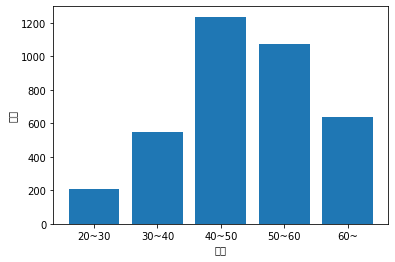

[205, 546, 1237, 1075, 640]


In [ ]:
age = df_r["Q2.3"].dropna(how='all')
age = age.astype(int)

age20 = age < 30
age30 = (30 < age) & (age < 40)
age40 = (40 < age) & (age < 50)
age50 = (50 < age) & (age < 60)
age60 = (60 < age)

age_list = [int(age20.sum()), int(age30.sum()), int(age40.sum()), int(age50.sum()), int(age60.sum())]
x = ["20~30","30~40","40~50","50~60","60~"]

xs = [i + 0.5 for i, _ in enumerate(x)] 


#plt.title("人", fontname="MS Gothic")  # グラフのタイトル
plt.xlabel("年齢", fontname="MS Gothic")
plt.ylabel("人数", fontname="MS Gothic")

plt.bar(xs , age_list)
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x)
plt.show()

print(age_list)

### 性別

/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22899 

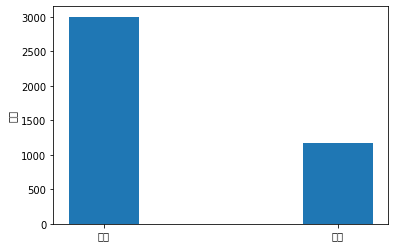

[3001, 1166]


In [ ]:
sex = df_r.loc[:,["Q2.2"]]
#sex = df_r["Q2.2"]

x = ["男性", "女性"]
xs = [i + 0.5 for i, _ in enumerate(x)] 

man = (sex == 1)
woman = (sex == 2)
sex_list = [int(man.sum()), int(woman.sum())]

plt.title("")  # グラフのタイトル

plt.ylabel("人数", fontname="MS Gothic")


plt.bar(xs, sex_list, width=0.3, )
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x, fontname="MS Gothic")
plt.show()

print(sex_list)

### 職業

findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32887 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/taki/.local/lib/python3.8/si

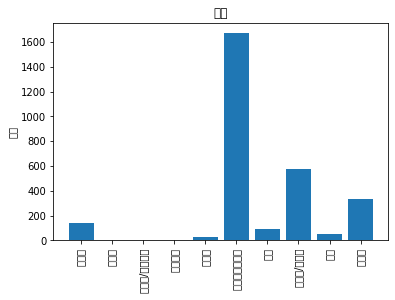

[141, 0, 0, 0, 30, 1670, 92, 576, 49, 331]


In [ ]:
# Q18 - 職業
s = "職業"
data = df_r["Q18"]
num = []
for i in range(1,11):
    num.append((data==i).sum())


x = ["会社員", "公務員", "自営業/個人事業", "会社役員", "自由業", "専業主婦・主夫", "学生", "バイト/パート", "無職", "その他"]
xs = [i + 0.5 for i, _ in enumerate(x)] 

plt.title(s, fontname="MS Gothic")  # グラフのタイトル
plt.ylabel("人数", fontname="MS Gothic")


plt.bar(xs,num)
plt.xticks([i + 0.5 for i, _ in enumerate(x)], x, fontname="MS Gothic",rotation=90)
plt.show()
print(num)

## 問題の文字型リスト作成

In [ ]:
str_list   = []
list_32    = []
list_33_37 = []
for i in range(1,33):
    s = "Q3.2_"
    str_list.append(s+"{}".format(i))
    list_32.append(s+"{}".format(i))
    
for i in range(3,8):
    str_list.append("Q3.{}".format(i))
    list_33_37.append("Q3.{}".format(i))
    
str_list.insert(0,"Q3.1_1")

str_list

['Q3.1_1',
 'Q3.2_1',
 'Q3.2_2',
 'Q3.2_3',
 'Q3.2_4',
 'Q3.2_5',
 'Q3.2_6',
 'Q3.2_7',
 'Q3.2_8',
 'Q3.2_9',
 'Q3.2_10',
 'Q3.2_11',
 'Q3.2_12',
 'Q3.2_13',
 'Q3.2_14',
 'Q3.2_15',
 'Q3.2_16',
 'Q3.2_17',
 'Q3.2_18',
 'Q3.2_19',
 'Q3.2_20',
 'Q3.2_21',
 'Q3.2_22',
 'Q3.2_23',
 'Q3.2_24',
 'Q3.2_25',
 'Q3.2_26',
 'Q3.2_27',
 'Q3.2_28',
 'Q3.2_29',
 'Q3.2_30',
 'Q3.2_31',
 'Q3.2_32',
 'Q3.3',
 'Q3.4',
 'Q3.5',
 'Q3.6',
 'Q3.7']

## 画像ごとの回答者数

In [21]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = df_r["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("参加者数")    
print("平均：",participant.mean())
print("標準偏差：",participant.std())
print("最小値：",participant.min())
print("最大値：",participant.max())

参加者数
平均： 0    20.875
dtype: float64
標準偏差： 0    4.579558
dtype: float64
最小値： 0    8
dtype: int64
最大値： 0    37
dtype: int64


In [23]:
df_r["{}_".format(5) + q_str].dropna(how='all')

747     60.0
1015    67.0
1071    70.0
1162    54.0
1267    28.0
1595    58.0
2364    70.0
2667    60.0
2689    40.0
2716    91.0
3303    42.0
3722    70.0
4024    51.0
4098    70.0
4163    30.0
Name: 5_Q3.1_1, dtype: object

In [ ]:
participant[0].nsmallest(50)

297     8
17      9
326     9
438     9
27     10
868    10
56     11
73     11
417    11
630    11
664    11
667    11
743    11
815    11
849    11
909    11
917    11
957    11
52     12
61     12
162    12
216    12
498    12
582    12
634    12
739    12
750    12
802    12
903    12
948    12
994    12
15     13
25     13
116    13
145    13
155    13
197    13
286    13
327    13
342    13
476    13
508    13
563    13
649    13
701    13
756    13
794    13
798    13
813    13
895    13
Name: 0, dtype: int64

In [ ]:
df_r.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       '1000_Q3.4', '1000_Q3.5', '1000_Q3.6', '1000_Q3.7', 'Q16_1', 'Q16_2',
       'Q16_3', 'Q16_4', 'Q17', 'SC0'],
      dtype='object', length=40028)

# データのクリーニング

## ダミー質問に不正解した回答者をチェック

In [ ]:
# ダミー質問の正解率５割以下の回答者のインデックス取得
drop_index_list = []
for i in range(11):
    tmp = df_r["SC0"].fillna(0).index[df_r['SC0'] == i]
    print(len(tmp))
    drop_index_list.extend(tmp)

In [ ]:
# ダミー質問の正解率５割以下の回答者
unhonest_df = df_r.iloc[drop_index_list]
unhonest_df

In [ ]:
print("ダミー質問正解率5割以下")
print("median:",unhonest_df['Duration (in seconds)'].median())
print("mean:",unhonest_df['Duration (in seconds)'].mean())
print("var:",unhonest_df['Duration (in seconds)'].var())

In [ ]:
print("ダミー質問正解率5割より上")
print("median:",df_r['Duration (in seconds)'].median())

print("mean:",df_r["Duration (in seconds)"].astype(int).mean())
print("var:",df_r['Duration (in seconds)'].astype(int).var())

## 1枚以上の画像に対してすべてどちらでもないと回答した人をリストに入れる

In [ ]:
# 問題名リスト作成
str_list   = []
list_32    = []
list_33_37 = []
for i in range(1,33):
    s = "Q3.2_"
    str_list.append(s+"{}".format(i))
    list_32.append(s+"{}".format(i))
    
for i in range(3,8):
    str_list.append("Q3.{}".format(i))
    list_33_37.append("Q3.{}".format(i))
    
str_list.insert(0,"Q3.1_1")

str_list

## 各回答者の回答内容を確認するセル

In [ ]:
# 32語の質問
tmp = df_r.loc[4140].dropna(how='all')
a = []
for i in range(1,1000):
    try:
        for q_num in list_32:
            print(i,tmp["{}_".format(i)+q_num])
            a.append(tmp["{}_".format(i)+q_num])
        #print(i)
    except:
        #print(i)
        pass
#break
print(len(a))

30 3.0
30 3.0
30 3.0
30 5.0
30 5.0
30 5.0
30 5.0
30 5.0
30 5.0
30 2.0
30 5.0
30 5.0
30 5.0
30 5.0
30 2.0
30 3.0
30 3.0
30 6.0
30 5.0
30 3.0
30 5.0
30 5.0
30 3.0
30 4.0
30 4.0
30 3.0
30 5.0
30 3.0
30 5.0
30 2.0
30 5.0
30 6.0
319 6.0
319 5.0
319 6.0
319 5.0
319 5.0
319 3.0
319 5.0
319 4.0
319 5.0
319 3.0
319 3.0
319 5.0
319 5.0
319 5.0
319 3.0
319 3.0
319 3.0
319 6.0
319 5.0
319 2.0
319 3.0
319 4.0
319 5.0
319 4.0
319 5.0
319 3.0
319 4.0
319 3.0
319 3.0
319 3.0
319 4.0
319 5.0
344 3.0
344 3.0
344 3.0
344 5.0
344 5.0
344 5.0
344 5.0
344 5.0
344 5.0
344 2.0
344 5.0
344 3.0
344 5.0
344 5.0
344 3.0
344 3.0
344 5.0
344 6.0
344 5.0
344 3.0
344 5.0
344 6.0
344 5.0
344 4.0
344 3.0
344 3.0
344 5.0
344 3.0
344 5.0
344 3.0
344 4.0
344 5.0
415 2.0
415 3.0
415 2.0
415 5.0
415 5.0
415 5.0
415 5.0
415 5.0
415 5.0
415 3.0
415 5.0
415 3.0
415 3.0
415 3.0
415 2.0
415 3.0
415 2.0
415 6.0
415 5.0
415 2.0
415 5.0
415 4.0
415 5.0
415 4.0
415 3.0
415 3.0
415 5.0
415 3.0
415 3.0
415 2.0
415 5.0
415 5.0
642 6.0


In [ ]:
# 評価軸の質問
tmp = df_r.loc[1].dropna(how='all')
a = []
for i in range(1,1000):
    try:
        for q_num in list_33_37:
            print(i,tmp["{}_".format(i)+q_num])
            a.append(tmp["{}_".format(i)+q_num])
        #print(i)
    except:
        #print(i)
        pass
#break
print(len(a))

165 3
165 4
165 4
165 4
165 5
359 7
359 7
359 7
359 7
359 7
470 3
470 3
470 3
470 3
470 3
541 6
541 6
541 6
541 6
541 7
877 4
877 4
877 5
877 5
877 6
25


## 1枚以上に同じ回答をした回答者のindexを保存

In [7]:
unhonest_user_index_list = []
count_list = []
for i in range(1,8):
    count_list.append(0)


def cnt_same_answer(usr_data, eval_value, count):# 同じ回答の数をカウントして返す関数
    if usr_data == eval_value:
        count = count + 1
    return count

for user_num in range(len(df_r)):# 全回答者を見る
    print("\r"+ "{}人目".format(user_num),end="")
    tmp = df_r.loc[user_num].dropna(how='all') # userをtmpにいれる
    unhonest_flg = False
    
    for i in range(1,1000):#1000枚の画像の回答

        try:# エラー回避（1000枚のうち5枚しかデータがないから）
            
            ########   32の評価語句に対して  ###############
            for q_num in list_32:# 1枚の画像の回答（32語の回答から見る）
                for j in range(len(count_list)):
                    count_list[j] = cnt_same_answer(usr_data=tmp["{}_".format(i)+q_num], eval_value=str(j), count=count_list[j])
                    #print("\r"+ "{}を{}個カウント".format(j,count_list[j]),end="")
                    #print("\r"+"{}:".format(j),count_list[j],end="")
    
        
            for j in range(len(count_list)):
                if count_list[j] == len(list_32):# すべてどちらでもないとしていたら、フラグ立てる
                    unhonest_flg = True
                count_list[j] = 0

            
            
            ########   5の評価軸に対して  ###############
            for q_num in list_33_37:# 1枚の画像の回答（32語の回答から見る）
                for j in range(len(count_list)):
                    count_list[j] = cnt_same_answer(usr_data=tmp["{}_".format(i)+q_num], eval_value=str(j), count=count_list[j])                
                

            for j in range(len(count_list)):
                if count_list[j] == len(list_32):# すべてどちらでもないとしていたら、フラグ立てる
                    unhonest_flg = True
                count_list[j] = 0
                    
            
        except:
            pass

    if unhonest_flg:
        unhonest_user_index_list.append(user_num)
        print("index_{}を追加しました".format(user_num))
        
    #break
#print("list32:",cnt_list32)
#print("list33_37:",cnt_list33_37)
print("unhonest_user_index:",unhonest_user_index_list)
#print("count_list",count_list)

NameError: name 'df_r' is not defined

### 不誠実回答者のデータ

In [6]:
unhonest_index = unhonest_user_index_list
un_df = df_r.iloc[unhonest_index]

unhonest_df
un_df = pd.concat([unhonest_df,un_df])
un_df

NameError: name 'unhonest_user_index_list' is not defined

## 回答時間の確認　回答時間が長すぎる人は削除？

### 不誠実回答者の回答時間分布

In [5]:
un_df[un_df['Duration (in seconds)'].astype(int) < 3000]['Duration (in seconds)'].astype(int).hist()

NameError: name 'un_df' is not defined

In [ ]:
unhonest_user = un_df[un_df['Duration (in seconds)'].astype(int) < 3000]['Duration (in seconds)'].astype(int)
print("mean",unhonest_user.mean())
print("std",unhonest_user.std())
print("median",unhonest_user.median())

mean 440.1194029850746
std 202.5186502738182
median 386.0


### 全データの回答時間分布

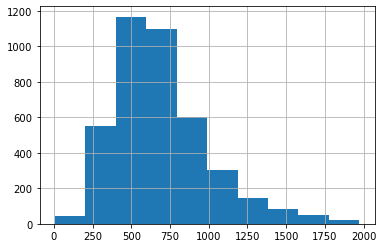

In [ ]:
df_r[df_r['Duration (in seconds)'].astype(int) < 2000]['Duration (in seconds)'].astype(int).hist()

In [ ]:
df_r[df_r['Duration (in seconds)'].astype(int) < 386]['Duration (in seconds)'].astype(int)

0       198
1       205
2       236
3       272
4       201
       ... 
4155    304
4161    324
4164    323
4166    247
4168    349
Name: Duration (in seconds), Length: 537, dtype: int64

In [ ]:
a = df_r[df_r['Duration (in seconds)'].astype(int) < 2000]['Duration (in seconds)'].astype(int)
print("mean",a.mean())
print("std",a.std())

mean 693.4782394885665
std 306.7188424419849


<AxesSubplot:>

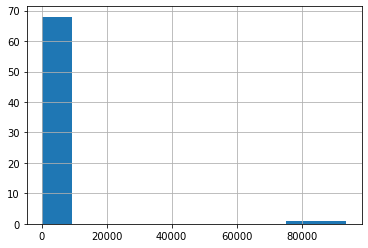

In [ ]:
un_df['Duration (in seconds)'].astype(int).hist()

<AxesSubplot:>

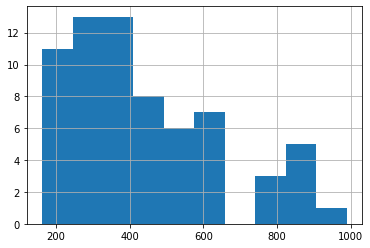

mean 440.1194029850746
std 202.5186502738182
median 386.0


<AxesSubplot:>

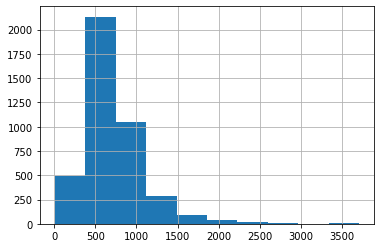

In [ ]:
df_r[df_r['Duration (in seconds)'].astype(int) < 4000]['Duration (in seconds)'].astype(int).hist()

# 誠実回答のデータ作成

## 不誠実回答者


In [8]:
# ダミー質問の正解率５割以下の回答者のインデックス取得
drop_index_list = []
for i in range(6):
    tmp = df_r["SC0"].fillna(0).index[df_r['SC0'] == i]
#    print(len(tmp))
    drop_index_list.extend(tmp)
len(drop_index_list)

67

In [9]:
unhonest_user_index_list = [1,4,6]

In [10]:
unhonest_user_index_list.extend(drop_index_list)

In [11]:
len(unhonest_user_index_list)

70

## 不誠実回答者の中央値以下の回答者

In [12]:
index = df_r.index[df_r['Duration (in seconds)'].astype(int) < 386]


In [14]:
len(index)

537

In [15]:
unhonest_user_index_list.extend(index)

In [16]:
len(unhonest_user_index_list)

607

## 誠実回答者のデータ

In [17]:
honest_df = df_r.drop(unhonest_user_index_list)
honest_df = honest_df.reset_index(drop=True)
honest_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,1000_Q3.4,1000_Q3.5,1000_Q3.6,1000_Q3.7,Q16_1,Q16_2,Q16_3,Q16_4,Q17,SC0
0,2022-01-07 11:00:30,2022-01-07 11:07:20,0,180.22.146.115,100,409,1,2022-01-07 11:07:20,R_3fpkfBGsIjikO4h,NaN,...,NaN,NaN,NaN,NaN,4,4,4,4,NaN,10.0
1,2022-01-07 11:00:26,2022-01-07 11:07:22,0,153.231.16.67,100,416,1,2022-01-07 11:07:23,R_31TNqYdcqP4G34n,NaN,...,NaN,NaN,NaN,NaN,2,5,4,4,NaN,10.0
2,2022-01-07 11:00:29,2022-01-07 11:07:30,0,111.239.160.78,100,421,1,2022-01-07 11:07:30,R_23ZFkUYHDU2bciY,NaN,...,NaN,NaN,NaN,NaN,2,4,1,5,???z?u???I???{?^???????????,10.0
3,2022-01-07 11:00:36,2022-01-07 11:07:39,0,220.5.139.23,100,422,1,2022-01-07 11:07:40,R_1dudJT5SpbbbvOF,NaN,...,NaN,NaN,NaN,NaN,4,1,3,5,NaN,10.0
4,2022-01-07 11:00:45,2022-01-07 11:07:44,0,119.231.92.38,100,418,1,2022-01-07 11:07:44,R_3fdAlVj370dTy0p,NaN,...,NaN,NaN,NaN,NaN,4,2,4,5,??V?????????,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,2022-01-12 16:22:10,2022-01-12 16:32:56,0,203.136.18.242,100,646,1,2022-01-12 16:32:57,R_2B4JZslJwt0TtjT,NaN,...,NaN,NaN,NaN,NaN,5,4,5,1,NaN,10
3601,2022-01-12 16:16:37,2022-01-12 16:38:18,0,114.170.105.224,100,1301,1,2022-01-12 16:38:19,R_21ytmvvO6egYX0R,NaN,...,NaN,NaN,NaN,NaN,5,6,6,3,???????B,9
3602,2022-01-12 16:32:11,2022-01-12 16:40:12,0,125.52.121.56,100,480,1,2022-01-12 16:40:12,R_ysic94lZcjztJKN,NaN,...,NaN,NaN,NaN,NaN,1,5,5,2,???????????B,10
3603,2022-01-12 16:21:12,2022-01-12 16:41:28,0,115.177.15.128,100,1216,1,2022-01-12 16:41:29,R_T0CMPLOeILZ3CkF,NaN,...,NaN,NaN,NaN,NaN,5,5,2,5,?A???P?[?g??i????????????????????,10


In [26]:
# 画像ごとの回答者数を保存
q_str = 'Q3.1_1'
participant = {}

for i in range(1,1001):
    q = honest_df["{}_".format(i) + q_str].dropna(how='all')
    participant["{}".format(str(i))] = len(q)

participant = pd.DataFrame(participant.values(),index=participant.keys())
print("参加者数")    
print("平均：",participant.mean())
print("標準偏差：",participant.std())
print("最小値：",participant.min())
print("最大値：",participant.max())

参加者数
平均： 0    18.025
dtype: float64
標準偏差： 0    4.226848
dtype: float64
最小値： 0    7
dtype: int64
最大値： 0    32
dtype: int64


In [20]:
honest_df.to_csv("honest_df.csv")

In [18]:
len(set(unhonest_user_index_list))

574

In [30]:
q_str = 'Q3.1_1'
honest_df["{}_".format(1) + q_str].dropna(how='all').mean()

68.75

# 因子分析用データセット作成

In [29]:
str_list   = []
list_32    = []
list_33_37 = []
for i in range(1,33):
    s = "Q3.2_"
    str_list.append(s+"{}".format(i))
    list_32.append(s+"{}".format(i))
    
for i in range(3,8):
    str_list.append("Q3.{}".format(i))
    list_33_37.append("Q3.{}".format(i))
    
str_list.insert(0,"Q3.1_1")

str_list

['Q3.1_1',
 'Q3.2_1',
 'Q3.2_2',
 'Q3.2_3',
 'Q3.2_4',
 'Q3.2_5',
 'Q3.2_6',
 'Q3.2_7',
 'Q3.2_8',
 'Q3.2_9',
 'Q3.2_10',
 'Q3.2_11',
 'Q3.2_12',
 'Q3.2_13',
 'Q3.2_14',
 'Q3.2_15',
 'Q3.2_16',
 'Q3.2_17',
 'Q3.2_18',
 'Q3.2_19',
 'Q3.2_20',
 'Q3.2_21',
 'Q3.2_22',
 'Q3.2_23',
 'Q3.2_24',
 'Q3.2_25',
 'Q3.2_26',
 'Q3.2_27',
 'Q3.2_28',
 'Q3.2_29',
 'Q3.2_30',
 'Q3.2_31',
 'Q3.2_32',
 'Q3.3',
 'Q3.4',
 'Q3.5',
 'Q3.6',
 'Q3.7']

In [43]:
img_dict = {}
dict_for_df = {}
for i in range(1,1001):
    img_dict = {}
    for q_str in str_list:
        img_dict[q_str] = honest_df["{}_".format(i) + q_str].dropna(how='all').mean()
    dict_for_df[str(i)] = img_dict

#bento_dataset_dict[]
dataset_df = pd.DataFrame(dict_for_df.values(),index=dict_for_df.keys())

In [44]:
dataset_df.to_csv("df_for_fa.csv")

In [45]:
dataset_df

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
1,68.750000,5.083333,4.750000,4.750000,4.166667,4.083333,3.583333,4.416667,4.000000,4.166667,...,4.750000,4.250000,5.500000,5.000000,5.083333,5.500000,4.583333,4.083333,4.166667,5.500000
2,55.789474,4.263158,4.578947,4.105263,4.368421,4.789474,4.526316,4.315789,4.263158,4.631579,...,4.842105,4.000000,5.315789,4.736842,5.368421,4.263158,4.263158,4.315789,3.894737,4.947368
3,71.111111,5.000000,5.277778,5.000000,3.722222,3.777778,3.277778,4.333333,4.222222,4.000000,...,4.777778,4.055556,5.666667,5.388889,5.722222,5.500000,4.388889,4.277778,4.444444,5.111111
4,52.769231,3.692308,3.923077,3.692308,5.153846,5.384615,5.076923,4.769231,4.769231,4.461538,...,4.230769,3.769231,5.384615,4.615385,5.923077,4.000000,4.000000,4.923077,4.076923,5.307692
5,57.400000,3.200000,3.466667,3.266667,4.733333,4.800000,4.600000,4.200000,4.333333,4.266667,...,4.133333,3.666667,4.866667,4.666667,5.533333,3.933333,4.333333,5.000000,3.933333,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,70.529412,4.941176,4.647059,4.588235,4.470588,4.647059,4.058824,4.705882,4.823529,4.941176,...,5.000000,3.823529,5.176471,5.000000,5.647059,5.352941,4.764706,4.882353,5.058824,5.176471
997,60.950000,5.100000,5.100000,5.300000,3.350000,3.650000,3.100000,3.750000,3.700000,3.450000,...,4.650000,3.900000,4.900000,5.100000,5.150000,5.100000,3.850000,3.750000,4.050000,4.550000
998,73.928571,5.642857,5.571429,5.500000,3.071429,3.000000,2.285714,3.642857,3.214286,3.642857,...,4.500000,3.785714,5.214286,4.785714,5.071429,5.642857,4.357143,3.571429,4.071429,4.857143
999,63.250000,4.500000,5.000000,4.333333,4.583333,5.166667,4.000000,4.416667,4.250000,4.333333,...,4.833333,4.166667,3.583333,5.083333,5.333333,5.000000,5.250000,4.500000,4.500000,4.750000
